# Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('datasets/data_for_ml.csv')
df.sample(3)

,Dog breed,lifetime_cost,intellingence_ranking,longevity,weight_kg,shoulder_height_cm,obey_first_command_%_of_time,Renta media/pers (€),Áreas caninas (m²),n_genetic_diseases,tricks_yes,size_category_enc,intelligence_category_enc,house_type_enc,owners_physical_activity_enc
1250,Basenji,22433.796670,1.973075,13.339124,9.428752,42.528826,30,20103.0,1764.0,3,1.0,1.0,0.0,3.0,3.0
1039,Gordon Setter,20280.600511,62.047718,10.997587,27.410952,66.649561,30,16890.0,614.0,1,1.0,2.0,3.0,2.0,1.0
180,Cocker Spaniel,24250.544490,80.191812,12.706520,11.080404,34.477982,85,25956.0,623.0,2,0.0,0.0,4.0,0.0,2.0


# Variables para cada cosa a analizar:



## Tamaño (shoulder_height_cm)


In [5]:
X_tam = df[['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_tam = df['shoulder_height_cm']

## longevity

In [6]:
X_lon = df[['size_category_enc', 'Renta media/pers (€)', 'Áreas caninas (m²)','house_type_enc','owners_physical_activity_enc']]
y_lon = df['longevity']

## intelligence

In [7]:
X_int = df[['Renta media/pers (€)','size_category_enc', 'longevity', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_int = df['intellingence_ranking']

# ML Linear Regression en el orden de tamaño, longevidad e inteligencia

## Regresión linear

### Tamaño - Linear

In [8]:
scaler = StandardScaler()
X_train_tam, X_test_tam, y_train_tam, y_test_tam = train_test_split(X_tam, y_tam, test_size=0.2, random_state=1)
scaler.fit(X_train_tam)
X_train_tam_scaled = scaler.transform(X_train_tam)
X_test_tam_scaled = scaler.transform(X_test_tam)
lr_1_tam = LinearRegression()
lr_1_tam.fit(X_train_tam_scaled, y_train_tam)

LinearRegression()

In [9]:
y_pred_tam1 = lr_1_tam.predict(X_test_tam_scaled)
mean_squared_error(y_test_tam, y_pred_tam1)

192.93194755505084

In [10]:
# Get the coefficients and intercept
coefficients = lr_1_tam.coef_
intercept = lr_1_tam.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('Tamaño:')

feature_names = X_tam.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

Tamaño:
Renta media/pers (€): -1.9276209256494004
Áreas caninas (m²): 6.712621682196244
tricks_yes: -1.345525184372684
house_type_enc: 4.4632010451156106
owners_physical_activity_enc: 3.577546429012683
Intercept: 46.732962529649875


Todas las variables aportan su granito de arena, no se borra ninguna.

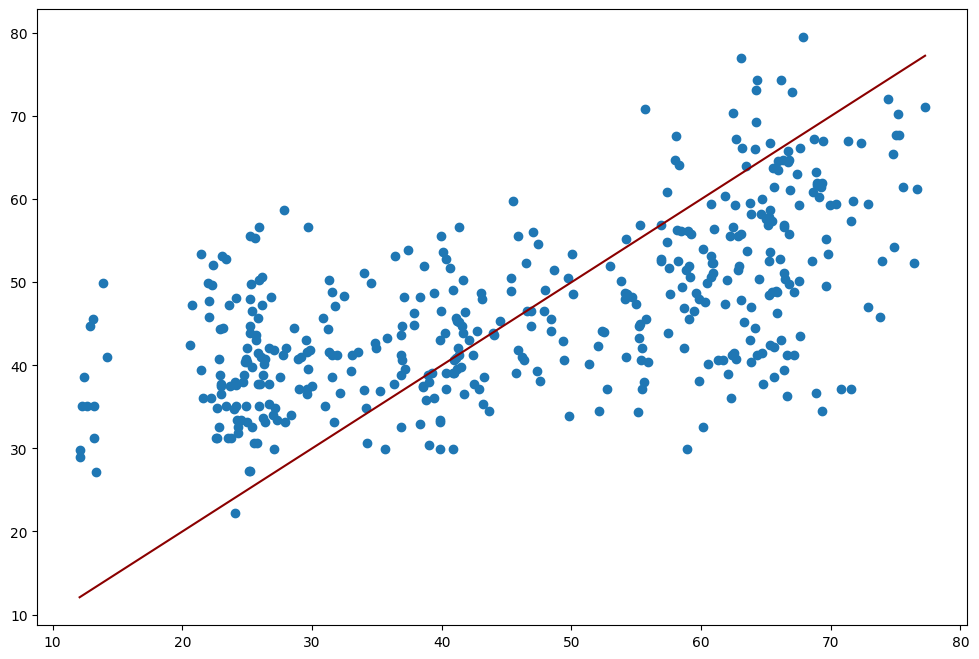

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_tam, y=y_pred_tam1, color='tab:blue')
plt.plot([min(y_test_tam),max(y_test_tam)],[min(y_test_tam),max(y_test_tam)], color='darkred')

### Longevidad

In [12]:
scaler = StandardScaler()
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_lon, y_lon, test_size=0.2, random_state=1)
scaler.fit(X_train_lon)
X_train_lon_scaled = scaler.transform(X_train_lon)
X_test_lon_scaled = scaler.transform(X_test_lon)
lr_1_lon = LinearRegression()
lr_1_lon.fit(X_train_lon_scaled, y_train_lon)

LinearRegression()

In [13]:
y_pred_lon1 = lr_1_lon.predict(X_test_lon)
mean_squared_error(y_test_lon, y_pred_lon1)

211801306.09484434

In [14]:
# Get the coefficients and intercept
coefficients = lr_1_lon.coef_
intercept = lr_1_lon.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('longevidad:')

feature_names = X_lon.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

longevidad:
size_category_enc: -0.8087073076631096
Renta media/pers (€): 0.8000908713701217
Áreas caninas (m²): -0.5017634373075699
house_type_enc: -0.013272212572698606
owners_physical_activity_enc: 0.017847254525656674
Intercept: 11.318138589234469


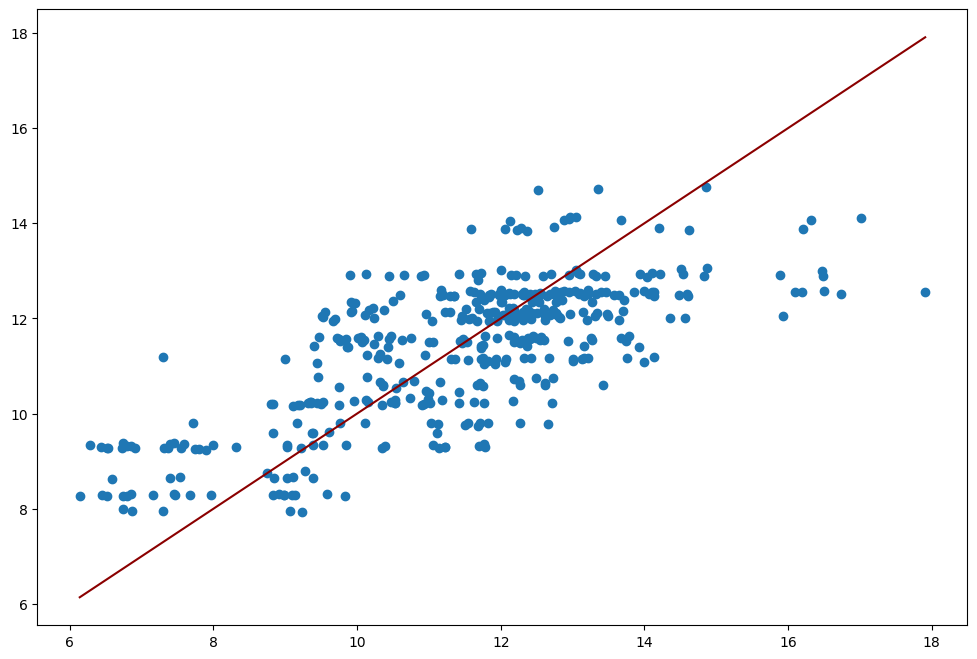

In [15]:
Y_PRED = lr_1_lon.predict(X_test_lon_scaled)
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_lon, y=Y_PRED, color='tab:blue')
plt.plot([min(y_test_lon),max(y_test_lon)],[min(y_test_lon),max(y_test_lon)], color='darkred')

### Inteligencia

In [16]:
scaler = StandardScaler()
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=1)
scaler.fit(X_train_int)
X_train_int_scaled = scaler.transform(X_train_int)
X_test_int_scaled = scaler.transform(X_test_int)
lr_1_int = LinearRegression()
lr_1_int.fit(X_train_int_scaled, y_train_int)

LinearRegression()

In [17]:
y_pred_int1 = lr_1_int.predict(X_test_int)
mean_squared_error(y_test_int, y_pred_int1)

5110861925.365644

In [18]:
# Get the coefficients and intercept
coefficients = lr_1_int.coef_
intercept = lr_1_int.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('inteligencia:')

feature_names = X_int.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

inteligencia:
Renta media/pers (€): 3.908370690432351
size_category_enc: 1.248588659223505
longevity: 2.040236273337263
Áreas caninas (m²): -2.2188786356242103
tricks_yes: -13.53370227305093
house_type_enc: -0.04364491181968524
owners_physical_activity_enc: -0.7909180978135454
Intercept: 46.85730456645764


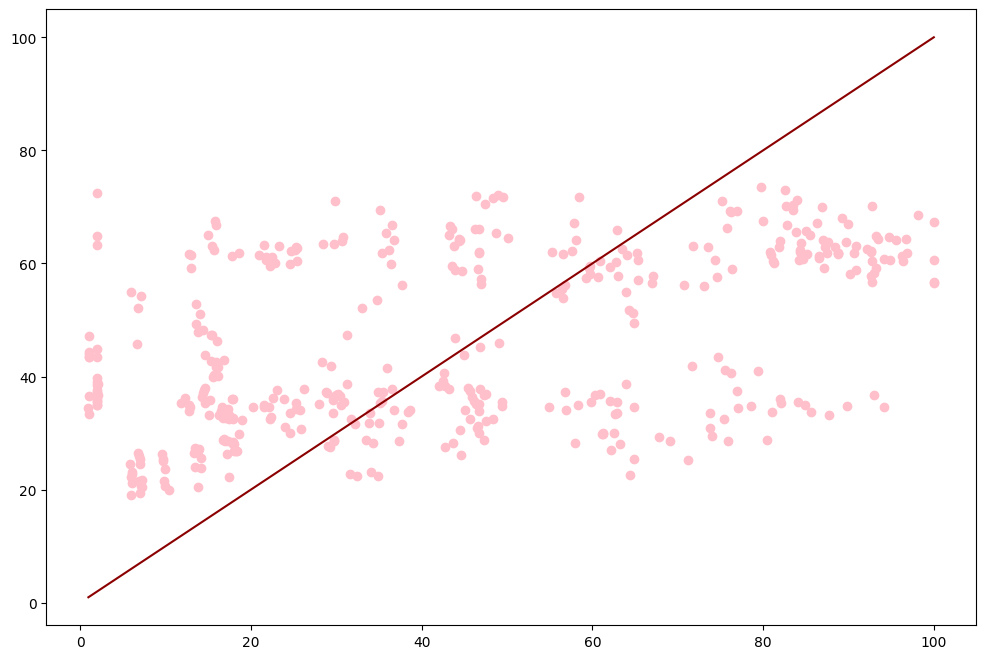

In [19]:
Y_PRED = lr_1_int.predict(X_test_int_scaled)
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_int, y=Y_PRED, color='pink')
plt.plot([min(y_test_int),max(y_test_int)],[min(y_test_int),max(y_test_int)], color='darkred')

## Regesiones polinómicas




### Tamaño - Polinomios

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_tam, X_test_tam, y_train_tam, y_test_tam = train_test_split(X_tam, y_tam, test_size=0.2, random_state=1)

# Escalar los datos
scaler = StandardScaler()
scaler.fit(X_train_tam)
X_train_tam_scaled = scaler.transform(X_train_tam)
X_test_tam_scaled = scaler.transform(X_test_tam)

# Generar características polinómicas de grado 2
poly2 = PolynomialFeatures(2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_tam_scaled)
X_test_poly2 = poly2.transform(X_test_tam_scaled)

# Generar características polinómicas de grado 3
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train_tam_scaled)
X_test_poly3 = poly3.transform(X_test_tam_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_tam)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_tam)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_tam, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_tam, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)


Mean Squared Error (Polynomial Regression) for pol 2: 169.7112855151867
Mean Squared Error (Polynomial Regression) for pol 3: 164.2750934339996
Ecuación de la regresión polinómicas:
y(d=2) = 916982867069.04 + 6.16x_1 + -91813124928.41x_2 + 4.31x_3 + 3.37x_4 + 1.10x_5 + -2.17x_6 + -0.58x_7 + 0.52x_8 + 0.51x_9 + 0.51x_10 + 0.61x_11 + -0.78x_12 + -0.33x_13 + -916982867019.91x_14 + -0.25x_15 + -0.26x_16 + -2.17x_17 + 0.65x_18 + -2.18x_19 
 y(d=3) = 20549058930935.61 + -133530744035003.09x_1 + 34375032811068.13x_2 + -77224663791815.61x_3 + 82689611400321.39x_4 + -38491178688876.46x_5 + 0.49x_6 + -2.84x_7 + 13369797108115.35x_8 + 0.42x_9 + 0.55x_10 + 1.25x_11 + -3441808233675.92x_12 + -0.44x_13 + 0.28x_14 + -13021684027207.48x_15 + -8279316762299.14x_16 + 3853938306429.77x_17 + -2.02x_18 + 0.69x_19 + -2.10x_20 + 0.73x_21 + -0.15x_22 + 0.03x_23 + 0.48x_24 + 0.36x_25 + 1.09x_26 + -0.26x_27 + -0.04x_28 + 0.66x_29 + 133530744034998.69x_30 + 1.11x_31 + -0.10x_32 + -0.54x_33 + 0.29x_34 + 0.03x_35 

Text(0.5, 1.0, 'Regresión Lineal')

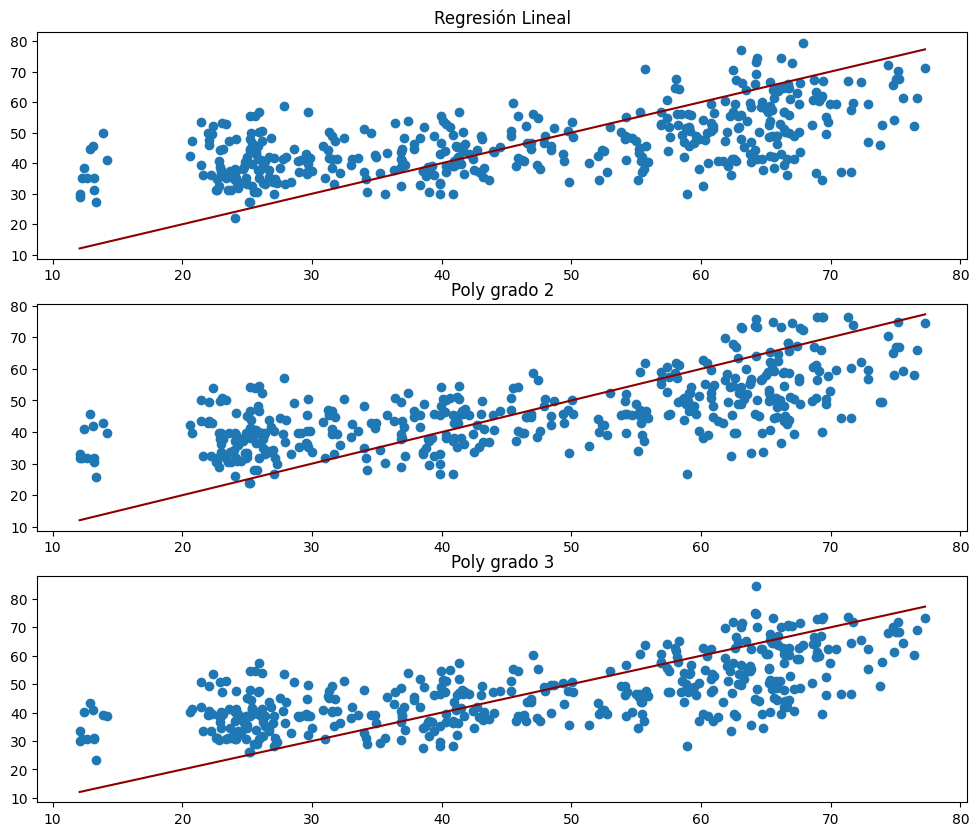

In [21]:
y_pred_d2 = lr_poly2.predict(X_test_poly2)
y_pred_d3 = lr_poly3.predict(X_test_poly3)
# y_test_tam
Y_PRED_tam = lr_1_tam.predict(X_test_tam_scaled)
# plt.scatter(x=y_test_tam1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3,1, figsize=(12,10))
axs[1].scatter(y_test_tam, y_pred_d2, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_tam, y_pred_d3, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_tam, Y_PRED_tam, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[0].set_title('Regresión Lineal')

### Longevidad - Polinomios

In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_lon, y_lon, test_size=0.2, random_state=1)

# Escalar los datos
scaler = StandardScaler()
scaler.fit(X_train_lon)
X_train_lon_scaled = scaler.transform(X_train_lon)
X_test_lon_scaled = scaler.transform(X_test_lon)

# Generar características polinómicas de grado 2
degree = 2
poly2 = PolynomialFeatures(degree)
X_train_poly2 = poly2.fit_transform(X_train_lon_scaled)
X_test_poly2 = poly2.transform(X_test_lon_scaled)

# Generar características polinómicas de grado 3
degree = 3
poly3 = PolynomialFeatures(degree)
X_train_poly3 = poly3.fit_transform(X_train_lon_scaled)
X_test_poly3 = poly3.transform(X_test_lon_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_lon)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_lon)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_lon, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_lon, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)

Mean Squared Error (Polynomial Regression) for pol 2: 1.9043147251577346
Mean Squared Error (Polynomial Regression) for pol 3: 1.8850139496381575
Ecuación de la regresión polinómicas:
y(d=2) = 11.79 + -0.73x_1 + 0.88x_2 + -0.39x_3 + -0.00x_4 + 0.02x_5 + -0.06x_6 + -0.08x_7 + -0.05x_8 + -0.03x_9 + -0.03x_10 + -0.21x_11 + 0.14x_12 + -0.00x_13 + -0.02x_14 + -0.09x_15 + -0.00x_16 + 0.06x_17 + -0.01x_18 + 0.04x_19 + -0.06x_20 
 y(d=3) = 939722725.50 + -38263585658.10x_1 + 0.93x_2 + -0.28x_3 + 0.07x_4 + 0.11x_5 + -2038753425.91x_6 + -0.08x_7 + -0.13x_8 + -0.02x_9 + -0.04x_10 + -0.17x_11 + 0.29x_12 + 0.01x_13 + -0.04x_14 + 0.29x_15 + 0.03x_16 + 0.12x_17 + 0.01x_18 + 0.03x_19 + -0.06x_20 + 27515790226.42x_21 + -0.02x_22 + -0.17x_23 + -0.02x_24 + 0.07x_25 + -0.04x_26 + -0.04x_27 + 0.01x_28 + 0.02x_29 + 0.29x_30 + -0.02x_31 + -0.05x_32 + 0.06x_33 + -0.02x_34 + -0.08x_35 + -0.04x_36 + 0.11x_37 + 0.01x_38 + 0.03x_39 + 0.07x_40 + 0.04x_41 + -0.03x_42 + 0.01x_43 + 0.01x_44 + 0.07x_45 + -0.20x_46 + -

Text(0.5, 1.0, 'Regresión Lineal')

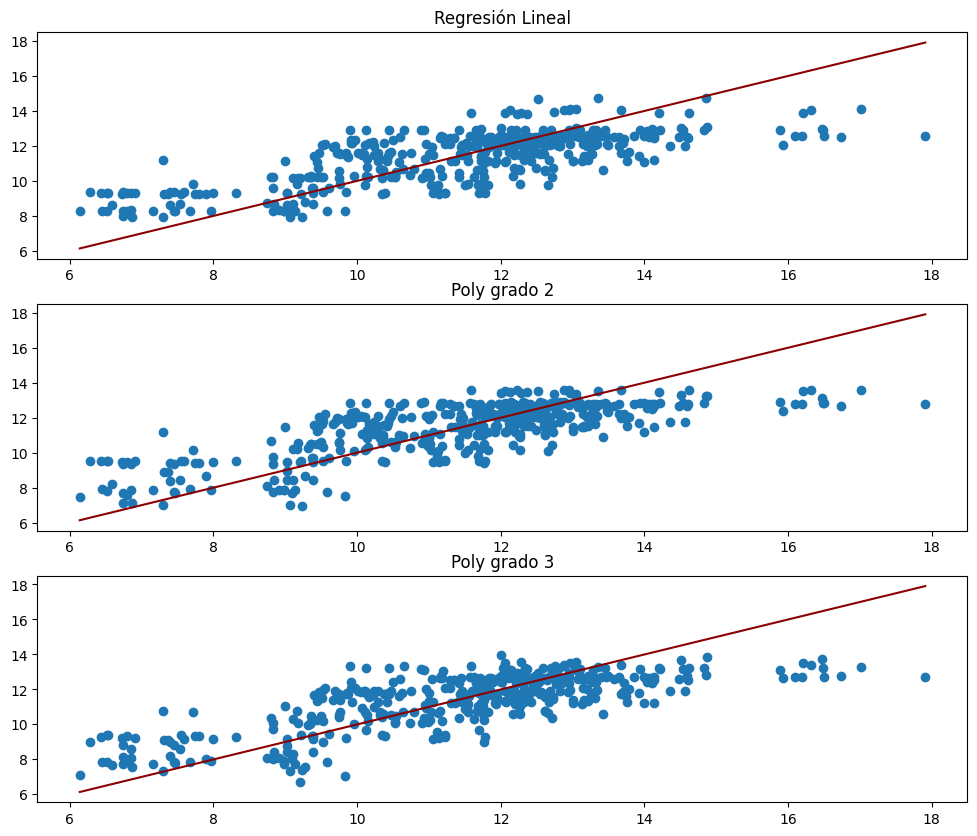

In [23]:
y_pred_d2_lon = lr_poly2.predict(X_test_poly2)
y_pred_d3_lon = lr_poly3.predict(X_test_poly3)
# y_test_lon
Y_PRED_lon = lr_1_lon.predict(X_test_lon_scaled)
# plt.scatter(x=y_test_lon1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3, 1, figsize=(12,10))
axs[1].scatter(y_test_lon, y_pred_d2_lon, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_lon, y_pred_d3_lon, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_lon, Y_PRED_lon, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[0].set_title('Regresión Lineal')

In [24]:
print('Lineal:')
print(f'MAE:  {mean_absolute_error(y_test_lon, Y_PRED_lon):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, Y_PRED_lon)):.2f}')

print('Polinomio grado 2:')
print(f'MAE:  {mean_absolute_error(y_test_lon, y_pred_d2):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d2_lon)):.2f}')

print('Polinomio grado 3:')
print(f'MAE:  {mean_absolute_error(y_test_lon, y_pred_d3):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d3_lon)):.2f}')

Lineal:
MAE:  1.13
RMSE: 1.42
Polinomio grado 2:
MAE:  34.98
RMSE: 1.38
Polinomio grado 3:
MAE:  35.34
RMSE: 1.37


### Inteligencia - Polinomios

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=1)

# Escalar los datos
scaler = StandardScaler()
scaler.fit(X_train_int)
X_train_int_scaled = scaler.transform(X_train_int)
X_test_int_scaled = scaler.transform(X_test_int)

# Generar características polinómicas de grado 2
degree = 2
poly2 = PolynomialFeatures(degree)
X_train_poly2 = poly2.fit_transform(X_train_int_scaled)
X_test_poly2 = poly2.transform(X_test_int_scaled)

# Generar características polinómicas de grado 3
degree = 3
poly3 = PolynomialFeatures(degree)
X_train_poly3 = poly3.fit_transform(X_train_int_scaled)
X_test_poly3 = poly3.transform(X_test_int_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_int)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_int)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_int, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_int, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)

Mean Squared Error (Polynomial Regression) for pol 2: 554.8186391595927
Mean Squared Error (Polynomial Regression) for pol 3: 542.4124526483926
Ecuación de la regresión polinómicas:
y(d=2) = -264191313458.26 + 2.64x_1 + 0.50x_2 + 1.46x_3 + 1.21x_4 + 26464486140.43x_5 + 0.14x_6 + -0.99x_7 + 0.32x_8 + -3.18x_9 + -2.66x_10 + 0.12x_11 + -1.55x_12 + 0.66x_13 + 1.01x_14 + -4.72x_15 + -1.58x_16 + -2.98x_17 + -1.18x_18 + -0.62x_19 + -0.39x_20 + -5.54x_21 + 2.13x_22 + -1.61x_23 + -0.12x_24 + -0.69x_25 + 1.48x_26 + 0.69x_27 + -0.68x_28 + 0.29x_29 + 264313848428.12x_30 + -0.35x_31 + -0.53x_32 + -0.22x_33 + 0.98x_34 + 0.06x_35 
 y(d=3) = 35663702376569.10 + -9131468681369.55x_1 + 19581695093604.77x_2 + -20051404504319.00x_3 + -7707528646403.06x_4 + 5294960007121.25x_5 + 8669518403404.39x_6 + -254030152814.17x_7 + -0.12x_8 + -3.75x_9 + -0.09x_10 + 4.15x_11 + 914290446378.39x_12 + 0.84x_13 + 1.24x_14 + 768884317546.12x_15 + -3.79x_16 + -3.13x_17 + -515762672131.31x_18 + -0.51x_19 + -0.40x_20 + -9.11

Text(0.5, 1.0, 'Regresión Lineal')

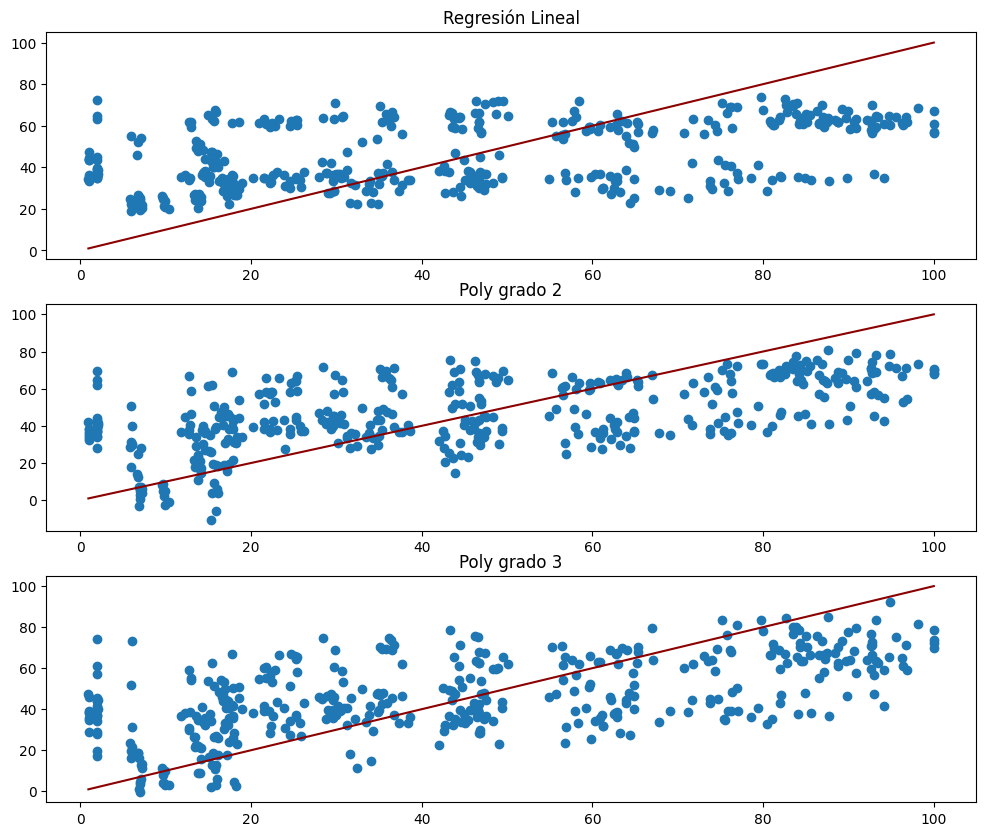

In [26]:
y_pred_d2 = lr_poly2.predict(X_test_poly2)
y_pred_d3 = lr_poly3.predict(X_test_poly3)
# y_test_int
Y_PRED_int = lr_1_int.predict(X_test_int_scaled)
# plt.scatter(x=y_test_int1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3, 1, figsize=(12,10))
axs[1].scatter(y_test_int, y_pred_d2, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_int, y_pred_d3, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_int, Y_PRED_int, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[0].set_title('Regresión Lineal')

# Decission Tree Regressor

## Tamaño

In [27]:
grid_params = {
    'tree__max_depth' : [2,4,6,8,10],
    'tree__min_samples_leaf' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
}

pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_tam = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [28]:
gs_dt_tam.fit(X_tam, y_tam)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 4, 6, 8, 10],
                         'tree__min_samples_leaf': [10, 20, 30, 40, 50, 60, 70,
                                                    80, 90, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [29]:
df_res_tam = pd.DataFrame(gs_dt_tam.cv_results_['params'])
df_res_tam['test_result'] = gs_dt_tam.cv_results_['mean_test_score']
df_res_tam ['train_result'] = gs_dt_tam.cv_results_['mean_train_score']
df_res_tam.head(3)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-211.710815,-191.680486
1,2,20,-211.710815,-191.680486
2,2,30,-211.710815,-191.680486


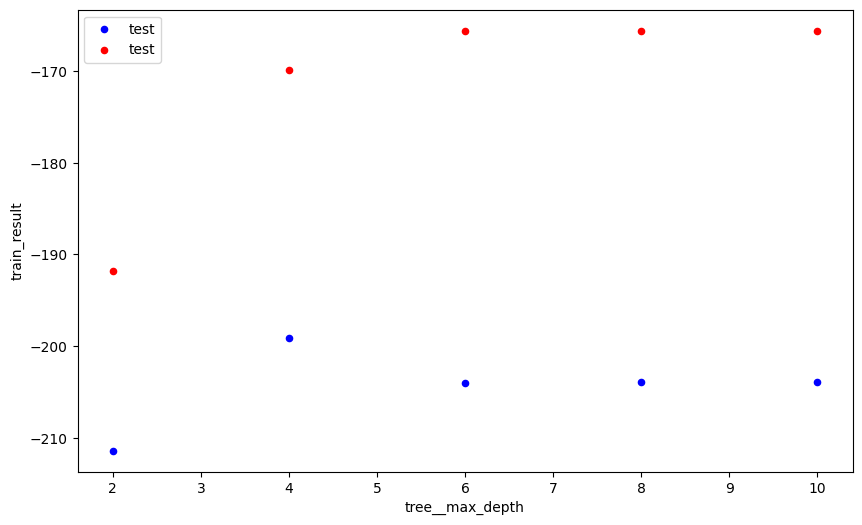

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_tam[df_res_tam['tree__min_samples_leaf']==90].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_tam[df_res_tam['tree__min_samples_leaf']==90].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

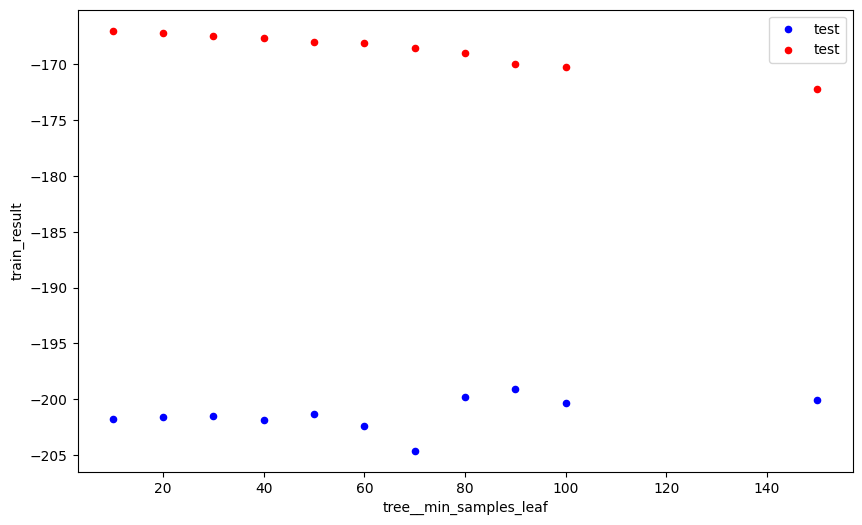

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_tam[df_res_tam['tree__max_depth']==4].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_tam[df_res_tam['tree__max_depth']==4].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 4

min_samples_lead = 90

## Longevidad

In [32]:
grid_params = {
    'tree__max_depth' : [2,4,6,8,10],
    'tree__min_samples_leaf' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
}

pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_lon = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [33]:
gs_dt_lon.fit(X_lon, y_lon)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 4, 6, 8, 10],
                         'tree__min_samples_leaf': [10, 20, 30, 40, 50, 60, 70,
                                                    80, 90, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [34]:
df_res_lon = pd.DataFrame(gs_dt_lon.cv_results_['params'])
df_res_lon['test_result'] = gs_dt_lon.cv_results_['mean_test_score']
df_res_lon ['train_result'] = gs_dt_lon.cv_results_['mean_train_score']
df_res_lon.head(2)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-3.699775,-2.086697
1,2,20,-3.699775,-2.086697


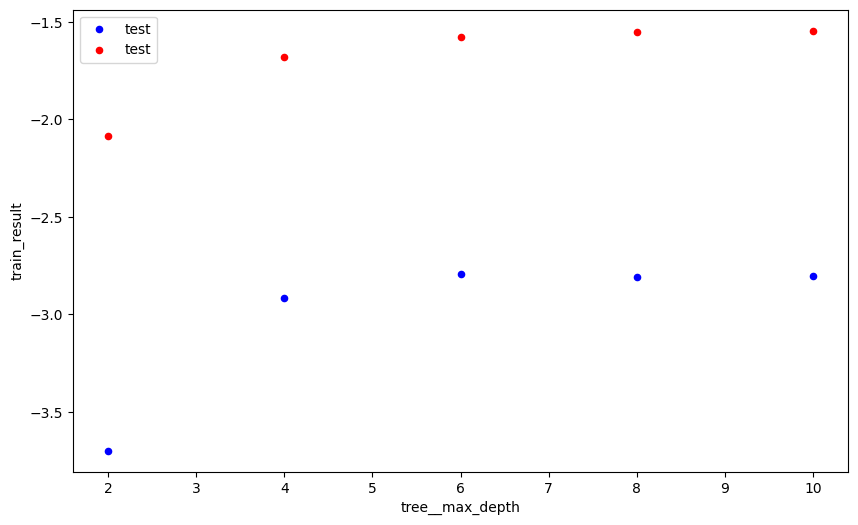

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_lon[df_res_lon['tree__min_samples_leaf']==20].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_lon[df_res_lon['tree__min_samples_leaf']==20].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

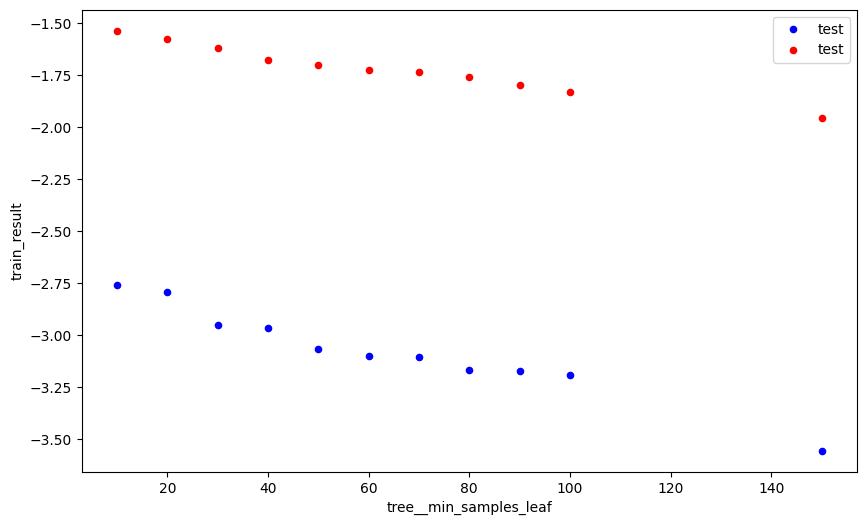

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_lon[df_res_lon['tree__max_depth']==6].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_lon[df_res_lon['tree__max_depth']==6].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 6

min_samples_lead = 20

## Inteligencia

In [37]:
grid_params = {
    'tree__max_depth' : [2,3,4,5,6,7,8,9],
    'tree__min_samples_leaf' : [10, 20, 50, 100, 200, 300, 500]
}

pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_int = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [38]:
gs_dt_int.fit(X_int, y_int)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'tree__min_samples_leaf': [10, 20, 50, 100, 200, 300,
                                                    500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [39]:
df_res_int = pd.DataFrame(gs_dt_int.cv_results_['params'])
df_res_int['test_result'] = gs_dt_int.cv_results_['mean_test_score']
df_res_int ['train_result'] = gs_dt_int.cv_results_['mean_train_score']
df_res_int.head(3)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-793.112532,-565.068973
1,2,20,-793.112532,-565.068973
2,2,50,-793.112532,-565.068973


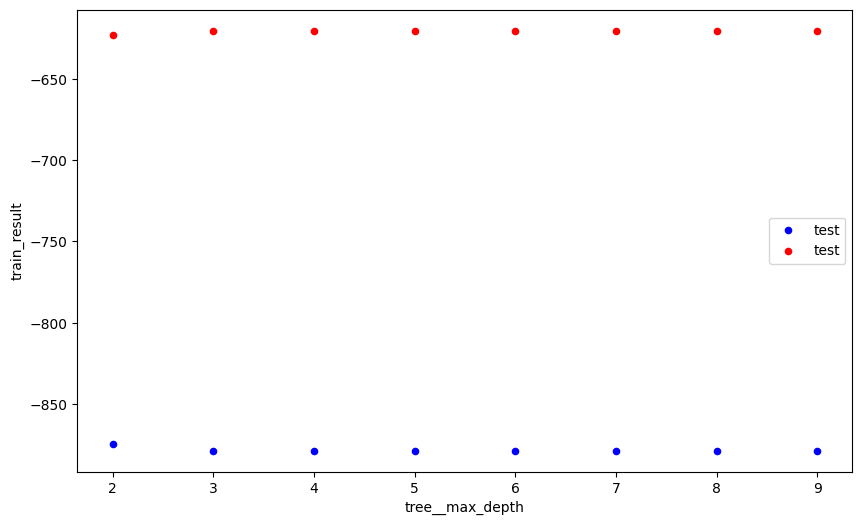

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_int[df_res_int['tree__min_samples_leaf']==300].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_int[df_res_int['tree__min_samples_leaf']==300].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

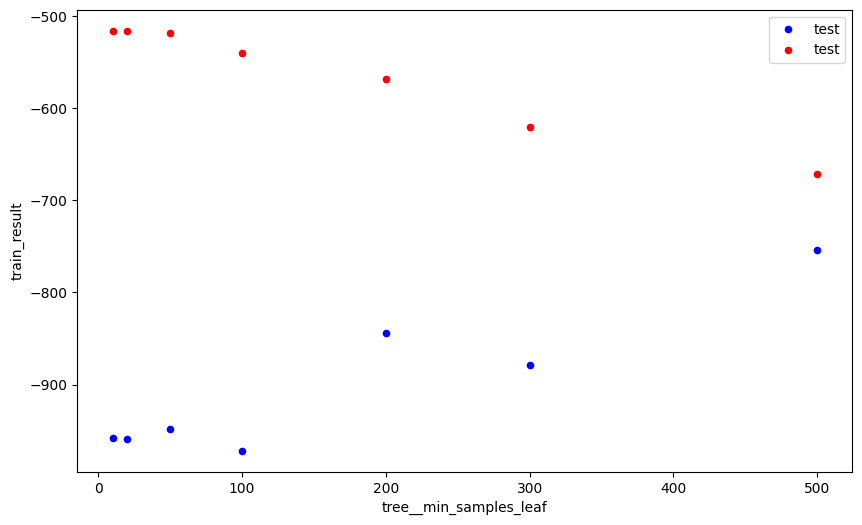

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_int[df_res_int['tree__max_depth']==3].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_int[df_res_int['tree__max_depth']==3].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 3

min_samples_lead = 100

### Viz pred trees

In [42]:
## Inteligencia
pipe_final_dt_int = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=3, min_samples_leaf=100))])
model_final_dt_int = pipe_final_dt_int.fit(X_int, y_int)
y_dt_pred_int = model_final_dt_int.predict(X_int)

## Longevidad
pipe_final_dt_lon = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=6, min_samples_leaf=20))])
model_final_dt_lon = pipe_final_dt_lon.fit(X_lon, y_lon)
y_dt_pred_lon = model_final_dt_lon.predict(X_lon)

## Tamaño
pipe_final_dt_tam = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=4, min_samples_leaf=90))])
model_final_dt_tam = pipe_final_dt_tam.fit(X_tam, y_tam)
y_dt_pred_tam = model_final_dt_tam.predict(X_tam)

Text(0.5, 1.0, 'Resultado D.Tree Tamaño')

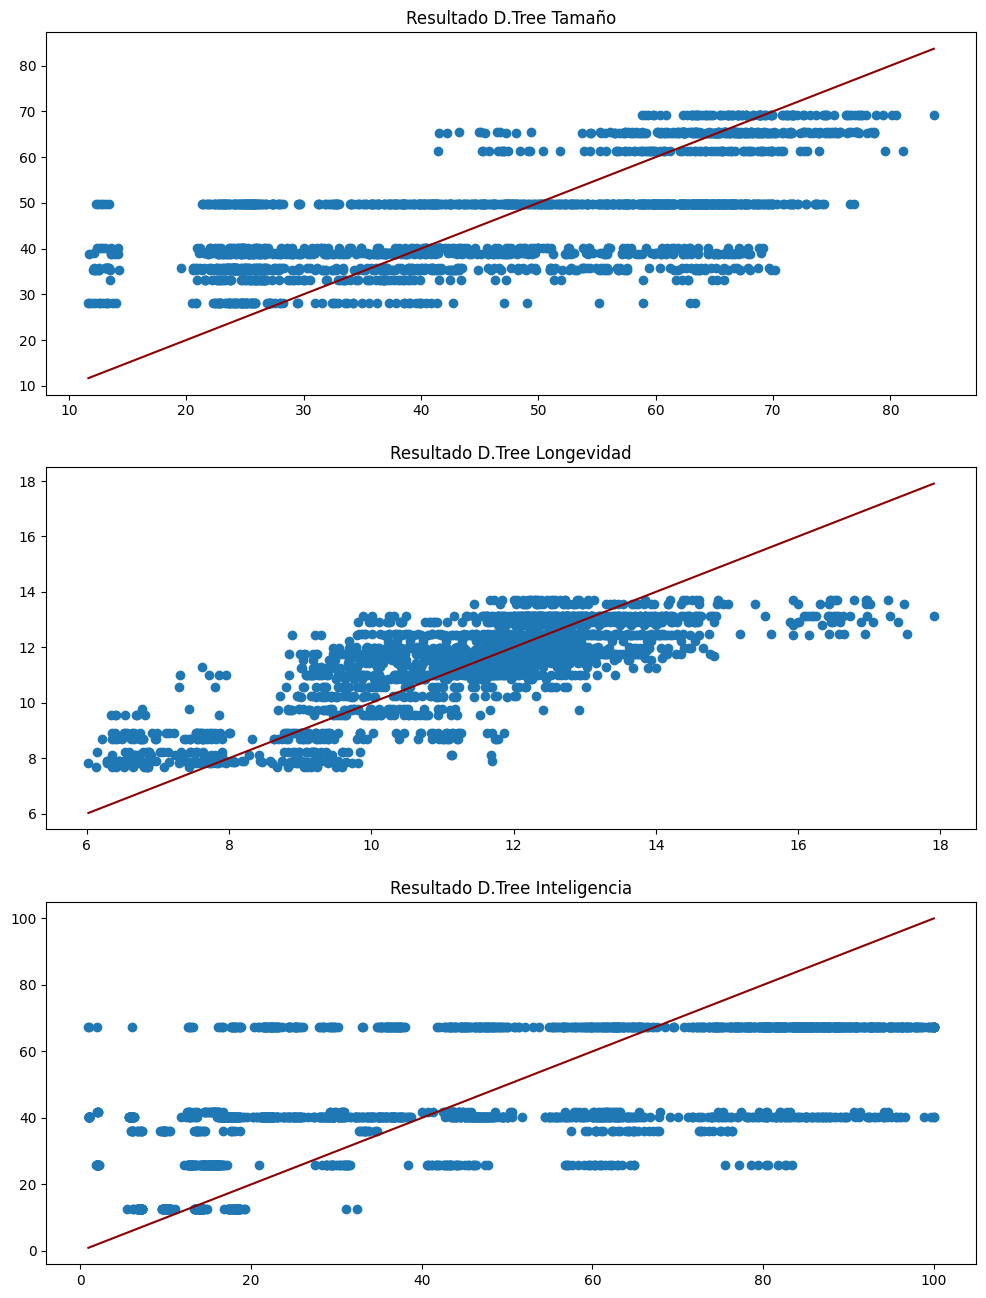

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(12,16))

axs[2].scatter(y_int, y_dt_pred_int, label='Poly grado 2', color='tab:blue')
axs[2].plot([min(y_int),max(y_int)], [min(y_int),max(y_int)], color='darkred')
axs[2].set_title('Resultado D.Tree Inteligencia')

axs[1].scatter(y_lon, y_dt_pred_lon, label='Poly grado 3', color='tab:blue')
axs[1].plot([min(y_lon),max(y_lon)], [min(y_lon),max(y_lon)], color='darkred')
axs[1].set_title('Resultado D.Tree Longevidad')

axs[0].scatter(y_tam, y_dt_pred_tam, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_tam),max(y_tam)], [min(y_tam),max(y_tam)], color='darkred')
axs[0].set_title('Resultado D.Tree Tamaño')

In [44]:
print('Tamaño:')
print(f'MAE:  {mean_absolute_error(y_tam, y_dt_pred_tam):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_dt_pred_tam)):.2f}')

print('Longevidad:')
print(f'MAE:  {mean_absolute_error(y_lon, y_dt_pred_lon):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_dt_pred_lon)):.2f}')

print('Inteligencia:')
print(f'MAE:  {mean_absolute_error(y_int, y_dt_pred_int):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_dt_pred_int)):.2f}')

Tamaño:
MAE:  10.56
RMSE: 13.09
Longevidad:
MAE:  0.99
RMSE: 1.28
Inteligencia:
MAE:  19.66
RMSE: 23.70


### Viz trees

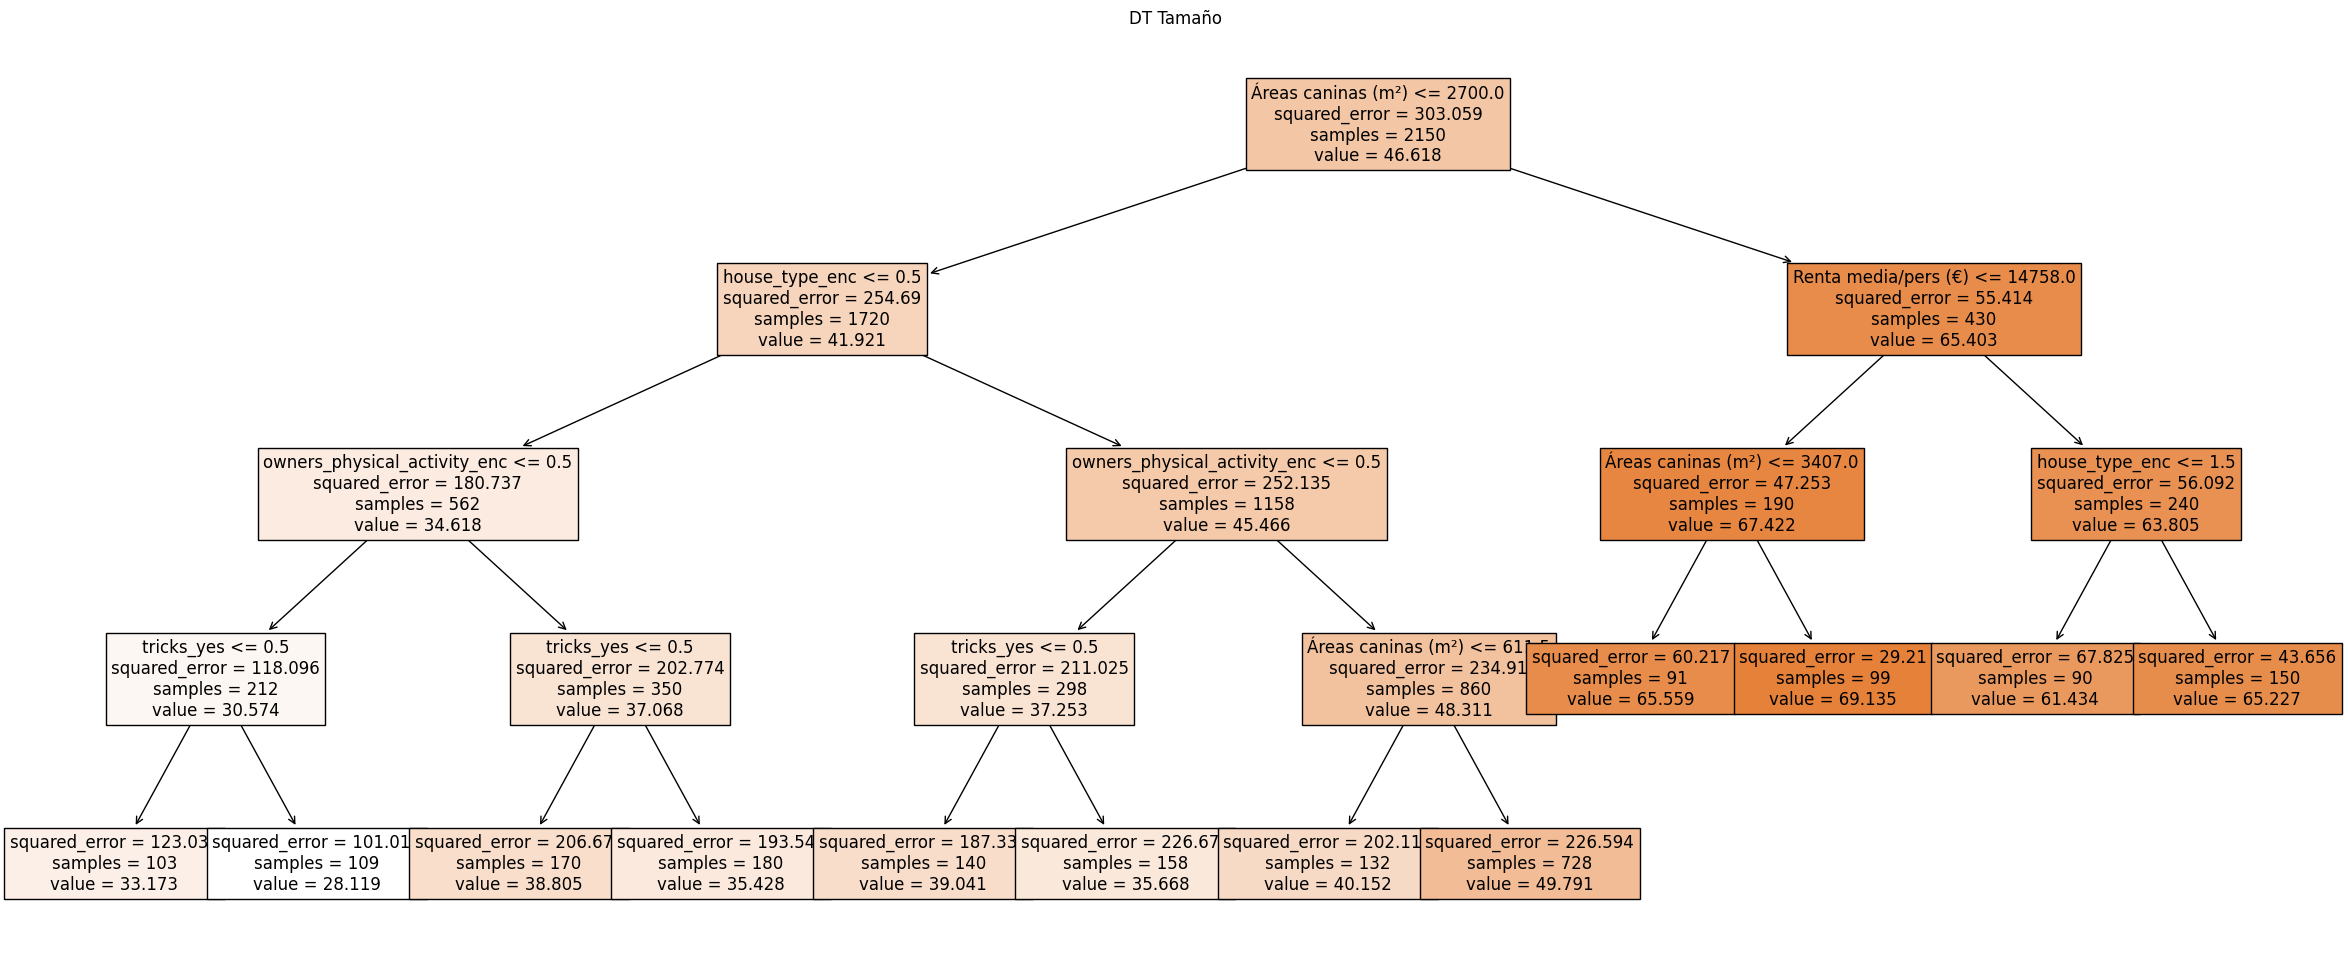

In [45]:
tree_tam = DecisionTreeRegressor(max_depth=4, min_samples_leaf=90)
tree_tam.fit(X_tam, y_tam)

fig, ax = plt.subplots(figsize=(30,12))
tree.plot_tree(tree_tam, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Tamaño')
plt.show()

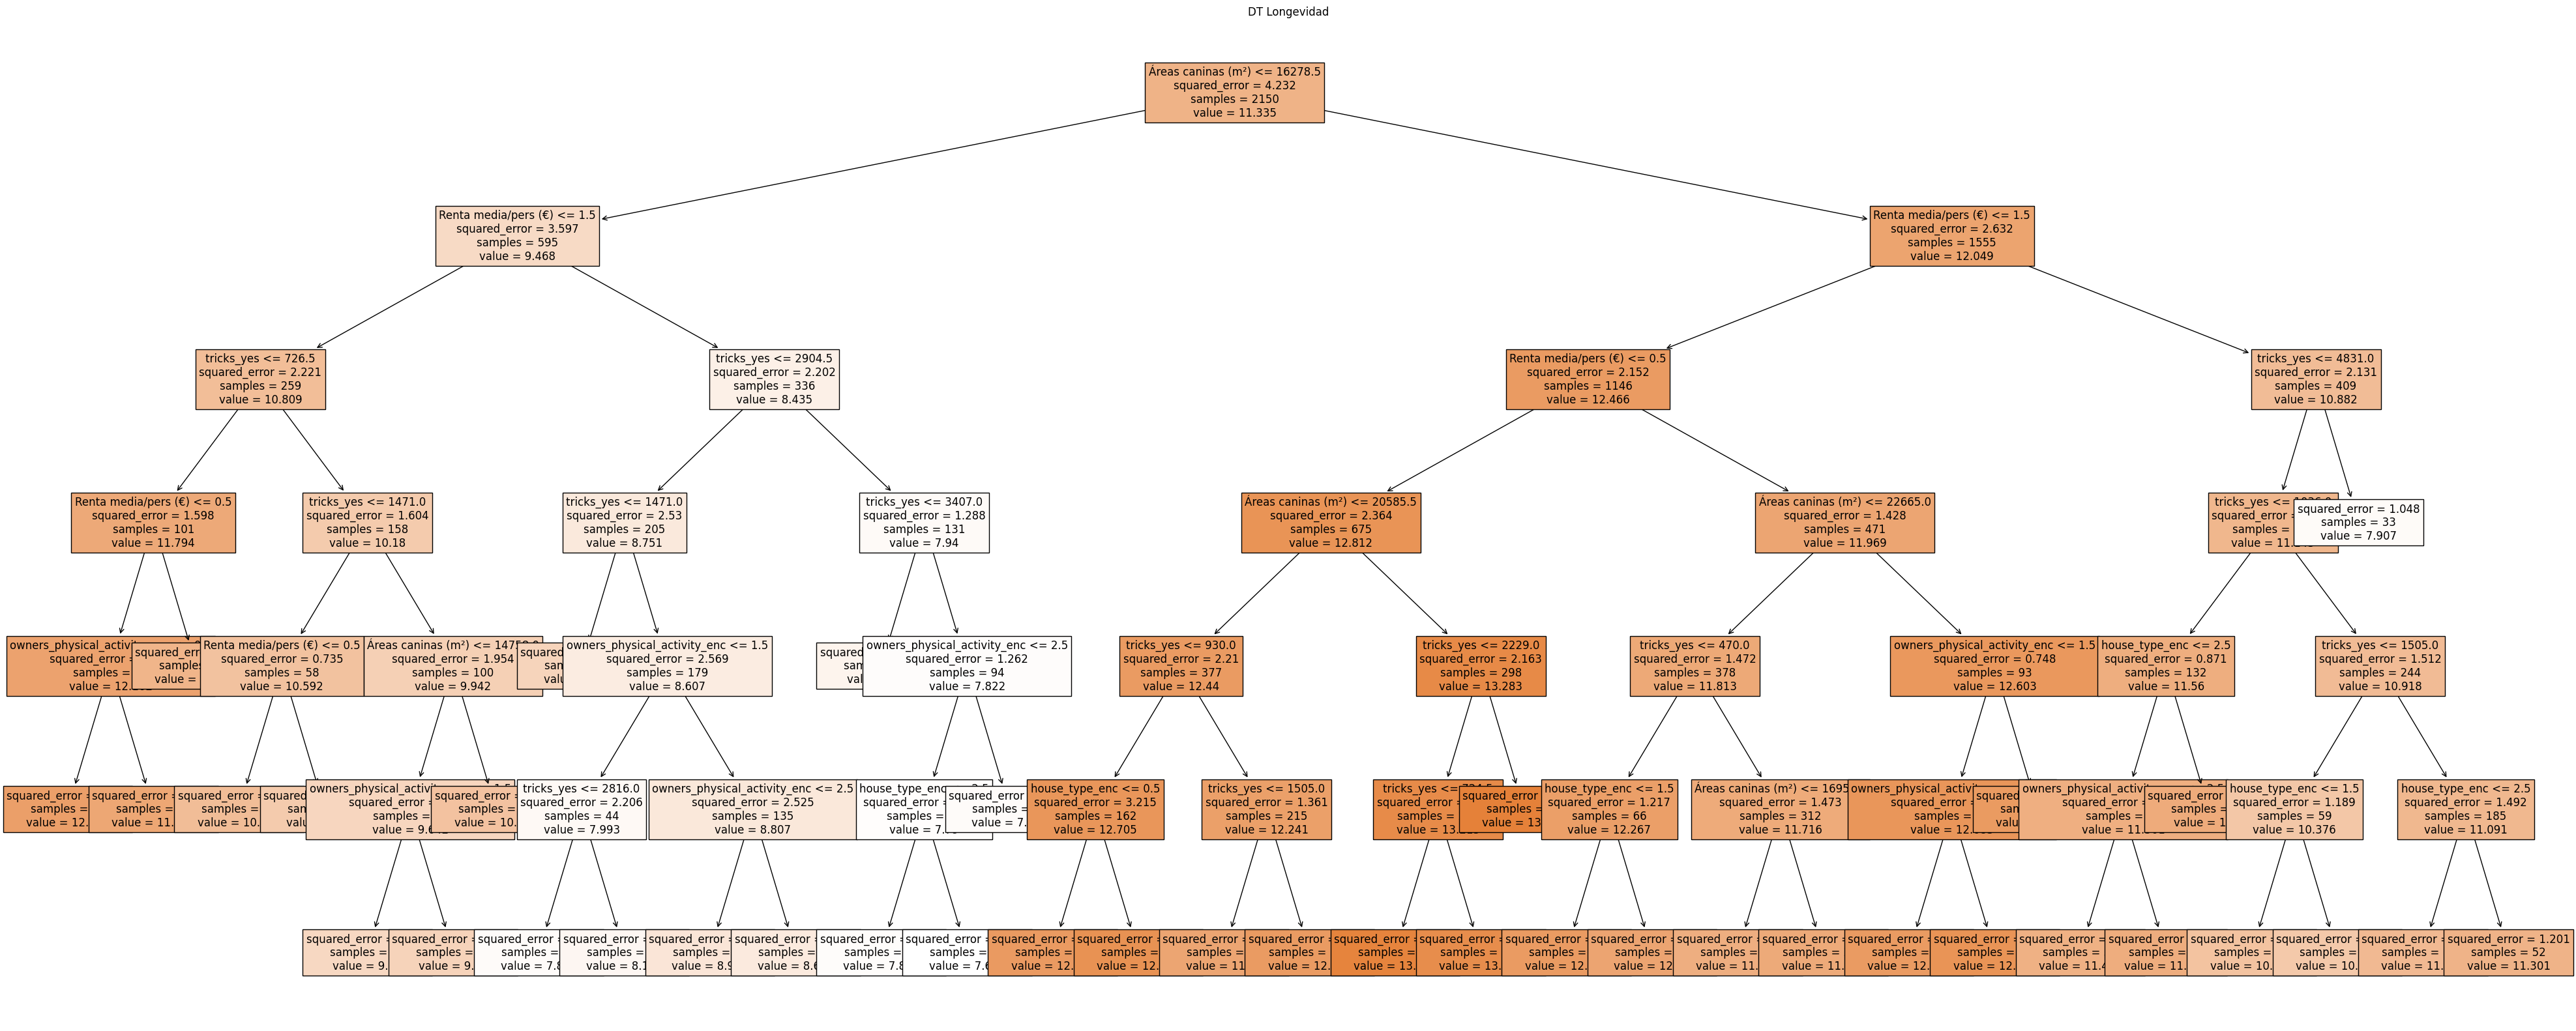

In [46]:
tree_lon = DecisionTreeRegressor(max_depth=6, min_samples_leaf=20)
tree_lon.fit(X_lon, y_lon)

fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(tree_lon, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Longevidad')
plt.show()

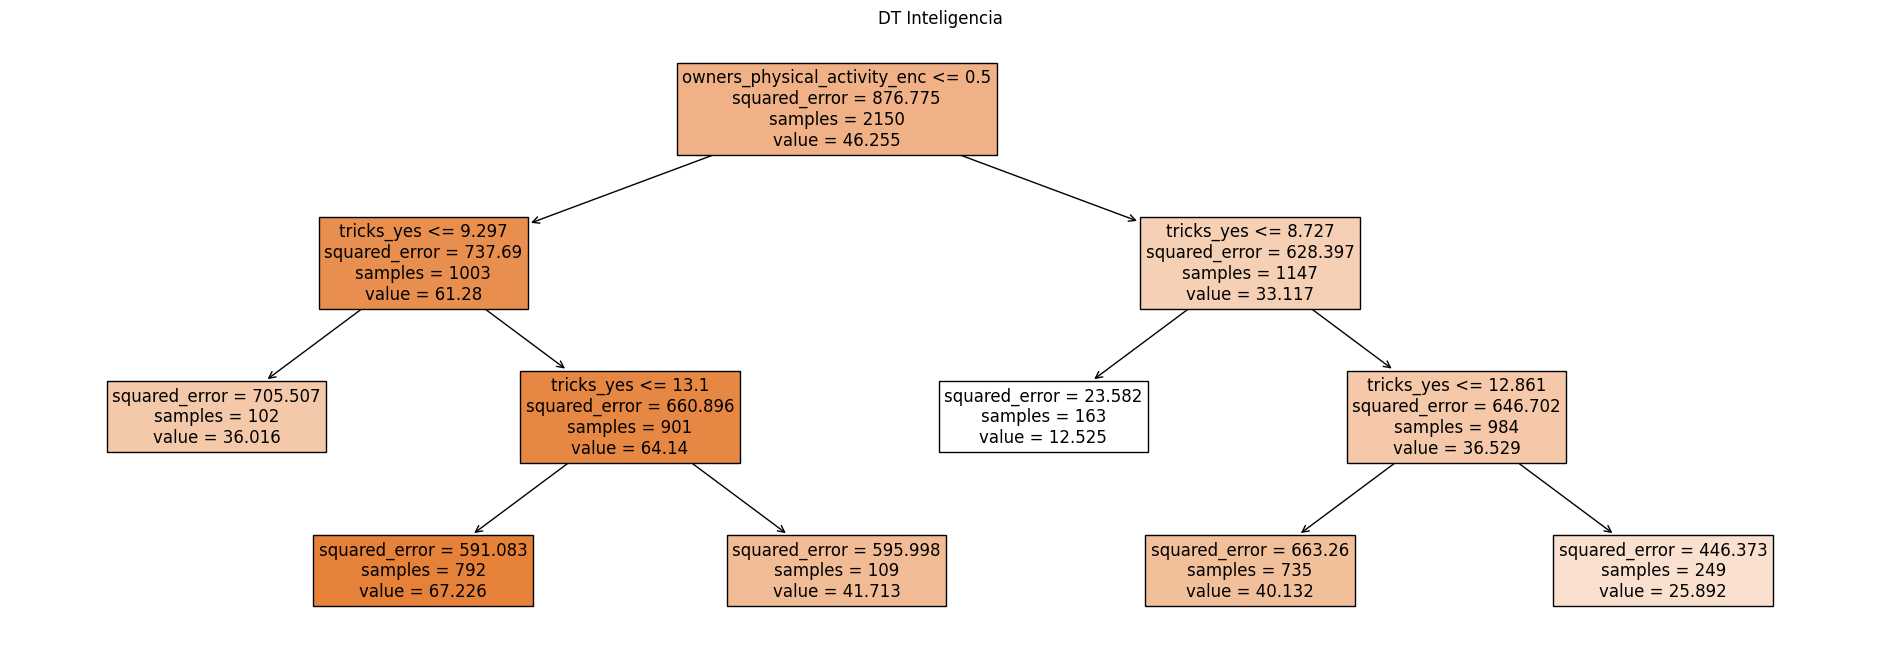

In [47]:
tree_int = DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)
tree_int.fit(X_int, y_int)

fig, ax = plt.subplots(figsize=(24,8))
tree.plot_tree(tree_int, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Inteligencia')
plt.show()

# Lasso

## Tamaño - Lasso

 El algoritmo Lasso (Least Absolute Shrinkage and Selection Operator) es una técnica de regularización que agrega una penalización a la magnitud de los coeficientes en un modelo de regresión lineal, ayudando así a prevenir el sobreajuste y a seleccionar características importantes. Permite un modelo más simple que generaliza mejor.

In [48]:
pipe1_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs1_lasso = GridSearchCV(pipe1_lasso, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [49]:

lasso_model1 = gs1_lasso.fit(X_tam, y_tam)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [50]:
#El test score más bajo lo da para alpha=0.001, por eso es el que toma como mejor parámetro. Comprobemos su diferencia con el resultado de train:
df_res = pd.DataFrame(gs1_lasso.cv_results_['params'])
df_res['test_result'] = gs1_lasso.cv_results_['mean_test_score']
df_res['train_result'] = gs1_lasso.cv_results_['mean_train_score']
df_res

,lasso__alpha,test_result,train_result
0,0.001,-239.004934,-186.866907
1,0.010,-238.996429,-186.867321
2,0.100,-238.947652,-186.908750
3,0.400,-238.896451,-187.510016
4,1.000,-242.831696,-190.425428


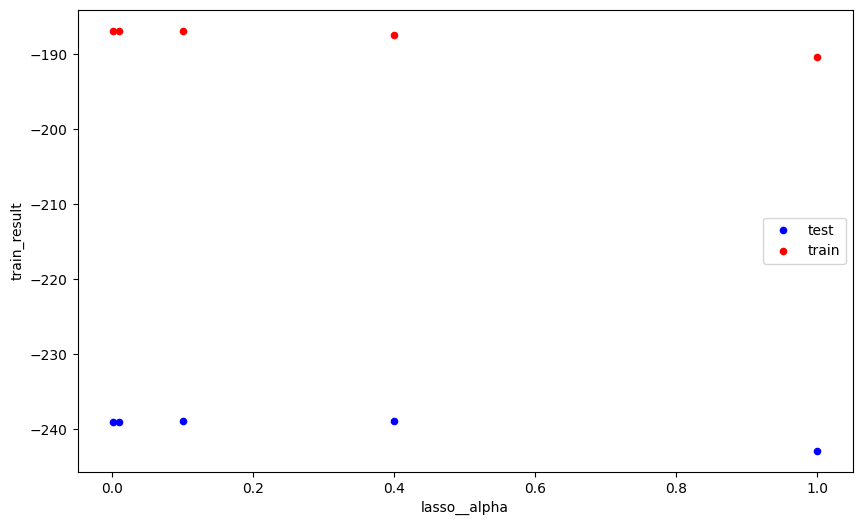

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('lasso__alpha', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('lasso__alpha', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [52]:
#Con el gráfico anterior vemos que, evidentemente, el modelo es una mierda pero, en cualquier caso, el mejor parámetro (el que hace que resultado de train y test estén más parejos) es alpha=0.001
y_pred_tam_lasso = lasso_model1.predict(X_tam)

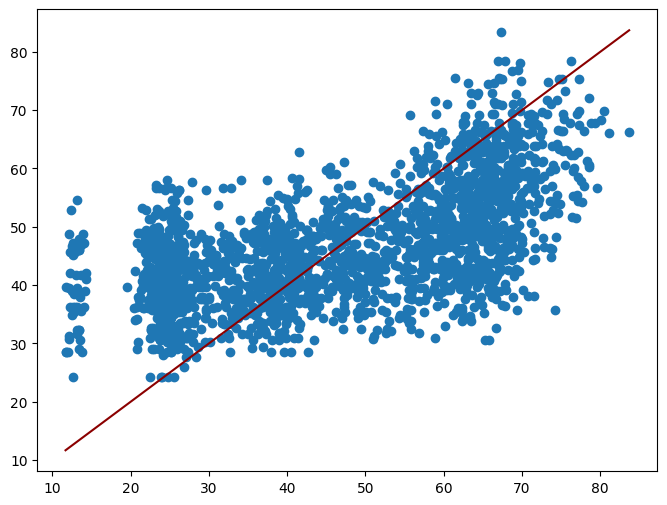

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_tam, y=y_pred_tam_lasso, color='tab:blue')
plt.plot([min(y_tam),max(y_tam)],[min(y_tam),max(y_tam)], color='darkred')

In [54]:
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_lasso)):.2f}')

MAE:  11.37
RMSE: 13.84


### Longevidad - Lasso

In [55]:
pipe2_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs2_lasso = GridSearchCV (pipe2_lasso, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [56]:
lasso_model2 = gs2_lasso.fit (X_lon, y_lon)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [57]:
df_res = pd.DataFrame(gs2_lasso.cv_results_['params'])
df_res['test_result'] = gs2_lasso.cv_results_['mean_test_score']
df_res['train_result'] = gs2_lasso.cv_results_['mean_train_score']
df_res

,lasso__alpha,test_result,train_result
0,0.001,-2.947712,-1.852373
1,0.010,-2.972522,-1.852713
2,0.100,-3.240218,-1.873060
3,0.400,-4.170519,-2.163147
4,1.000,-5.427579,-3.472888


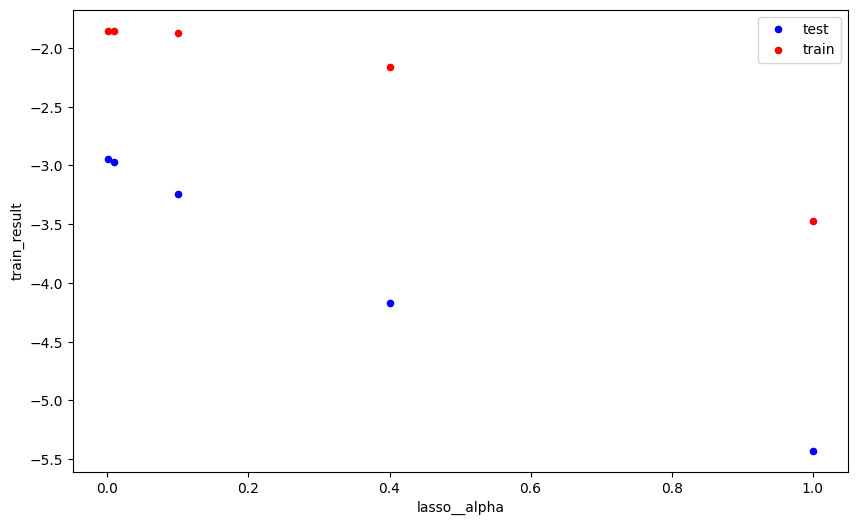

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('lasso__alpha', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('lasso__alpha', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [59]:
#Con el gráfico anterior vemos que el mejor parámetro (el que hace que resultado de train y test estén más parejos) es alpha=0.001
y_pred_lon_lasso = lasso_model2.predict(X_lon)

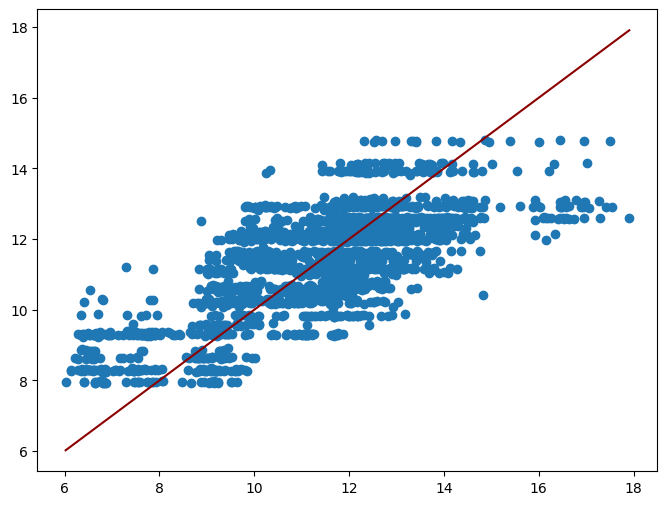

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_lon, y=y_pred_lon_lasso, color='tab:blue')
plt.plot([min(y_lon),max(y_lon)],[min(y_lon),max(y_lon)], color='darkred')

In [61]:
print('Lasso:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_lasso)):.2f}')

Lasso:
MAE:  1.10
RMSE: 1.39


### Inteligencia - Lasso

In [62]:
pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs = GridSearchCV (pipe, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=False)

In [63]:
fitted_model = gs.fit (X_int, y_int)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [64]:
# Realiza predicciones en el conjunto de prueba
y_pred_int_lasso = fitted_model.predict(X_int) #es lo mismo que hacer gs.predict

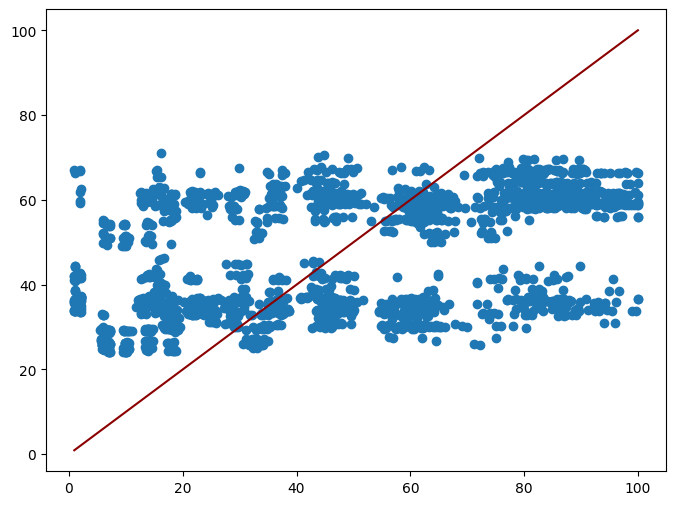

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_int, y=y_pred_int_lasso, color='tab:blue')
plt.plot([min(y_int),max(y_int)],[min(y_int),max(y_int)], color='darkred')

In [66]:
print('Lasso:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_lasso)):.2f}')

Lasso:
MAE:  21.67
RMSE: 25.52


# SVM regression - SVR

### Tamaño - SVM


In [67]:
pipe1_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 10.0]
}
gs1_svr= GridSearchCV(pipe1_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [68]:
svr_model1 = gs1_svr.fit(X_tam, y_tam)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [69]:
#Comprobamos diferencia entre train y test
df_res = pd.DataFrame(gs1_svr.cv_results_['params'])
df_res['test_result'] = gs1_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs1_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-233.225087,-189.347161
1,1.0,poly,-285.346417,-190.650611
2,1.0,rbf,-236.790569,-167.600319
3,1.0,sigmoid,-519.520684,-350.531383
4,2.0,linear,-233.418568,-189.373948
5,2.0,poly,-270.871928,-188.911280
6,2.0,rbf,-225.845622,-163.407888
7,2.0,sigmoid,-1777.886807,-1197.500792
8,10.0,linear,-233.399500,-189.415150
9,10.0,poly,-257.575340,-187.368274


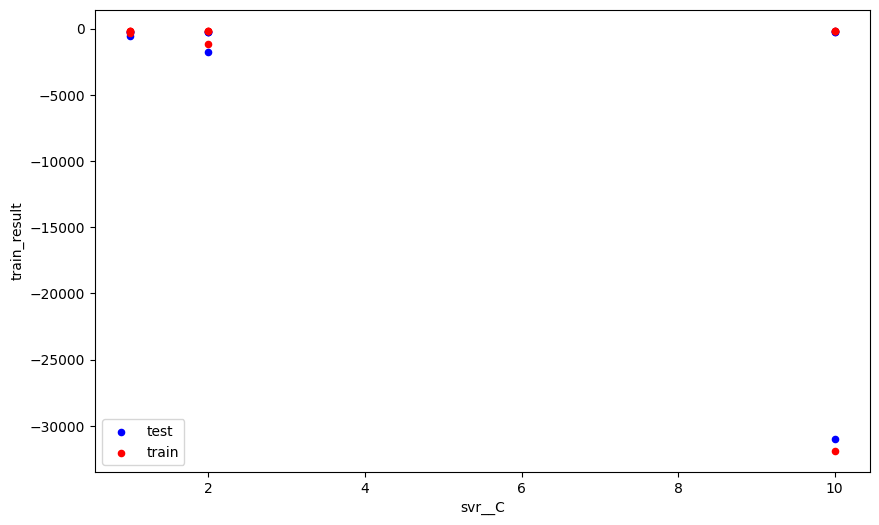

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [71]:
#Observo que el kernel (es por defecto) que mejores resultados da es el rbf pero voy a afinar la malla con el parámetro C

grid_params = {
    'svr__C' : [2.0,4.0,6.0,8.0,10.0,12.0]
}
gs1_svr_fino= GridSearchCV(pipe1_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)
gs1_svr_fino.fit(X_tam, y_tam)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [72]:
df_res2 = pd.DataFrame(gs1_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs1_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs1_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,test_result,train_result
0,2.0,-225.845622,-163.407888
1,4.0,-221.326752,-160.895335
2,6.0,-217.228201,-160.015923
3,8.0,-214.404417,-159.133366
4,10.0,-213.068335,-158.512231
5,12.0,-212.011660,-157.801030


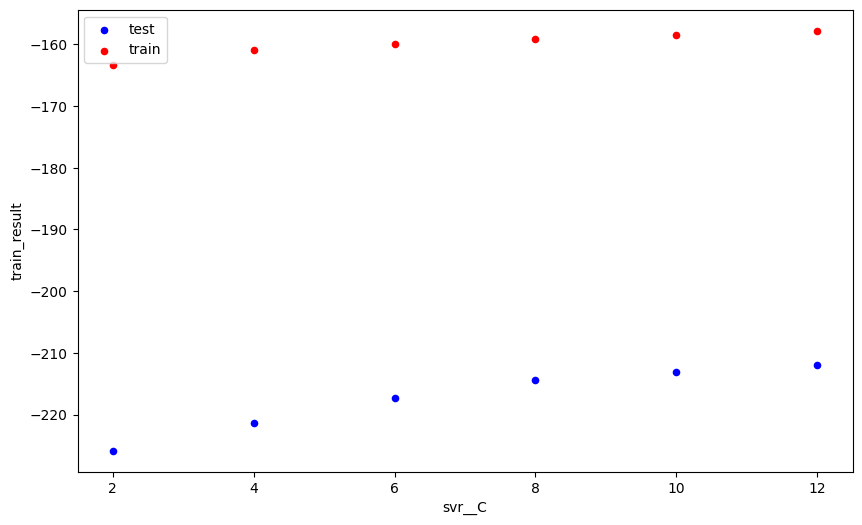

In [73]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

Observamos que, en todos los casos, la diferencia entre test y train es bastante grande, y que el valor de test mejora cuanto mayor es C.

Pero, también, cuanto mayor es C,menor es la fuerza de regularización de este parámetro, por lo que el modelo estaría más sobreentrenado.

Por tanto, me quedaría con un valor de C entre 4 y 6, ya que la diferencia entre train y test es parecida y no me arriesgo a perder la regularización que aporta C

In [74]:

pipe1_final = Pipeline([('scaler', StandardScaler()), ('svr', SVR(C=5.0, kernel='rbf'))])
final_svr_model = pipe1_final.fit(X_tam, y_tam)
y_pred_tam_svr = final_svr_model.predict(X_tam)


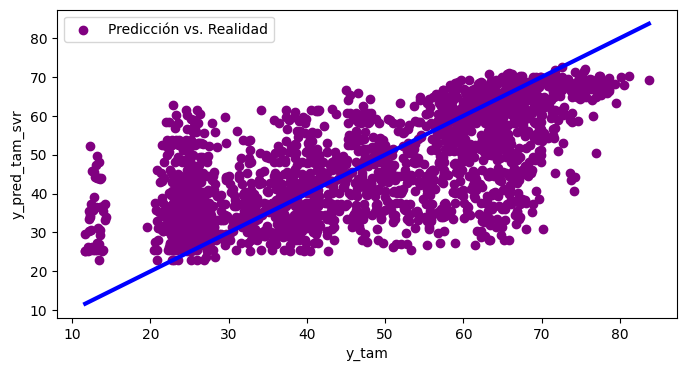

In [75]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_tam, y=y_pred_tam_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_tam), max(y_tam)], [min(y_tam), max(y_tam)], color='blue', linewidth=3)

ax.set_xlabel('y_tam')
ax.set_ylabel('y_pred_tam_svr')

ax.legend()


In [76]:
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_svr)):.2f}')

MAE:  9.76
RMSE: 12.82


### Longevidad - SVM

In [77]:
pipe2_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 6.0, 10.0]
}
gs2_svr= GridSearchCV(pipe2_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [78]:
svr_model2 = gs2_svr.fit(X_lon, y_lon)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [79]:
df_res = pd.DataFrame(gs2_svr.cv_results_['params'])
df_res['test_result'] = gs2_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs2_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-3.157044,-1.867947
1,1.0,poly,-3.226687,-1.905526
2,1.0,rbf,-2.787975,-1.602998
3,1.0,sigmoid,-724.325824,-484.127449
4,2.0,linear,-3.156275,-1.867704
5,2.0,poly,-3.257288,-1.892383
6,2.0,rbf,-2.778904,-1.572698
7,2.0,sigmoid,-2931.550568,-1791.343113
8,6.0,linear,-3.156507,-1.867667
9,6.0,poly,-3.279890,-1.886930


#Vemos que kernel=poly es claramente mejor que el resto. Ahora, vamos a comparar, con el factor C, la diferencia entre train y test

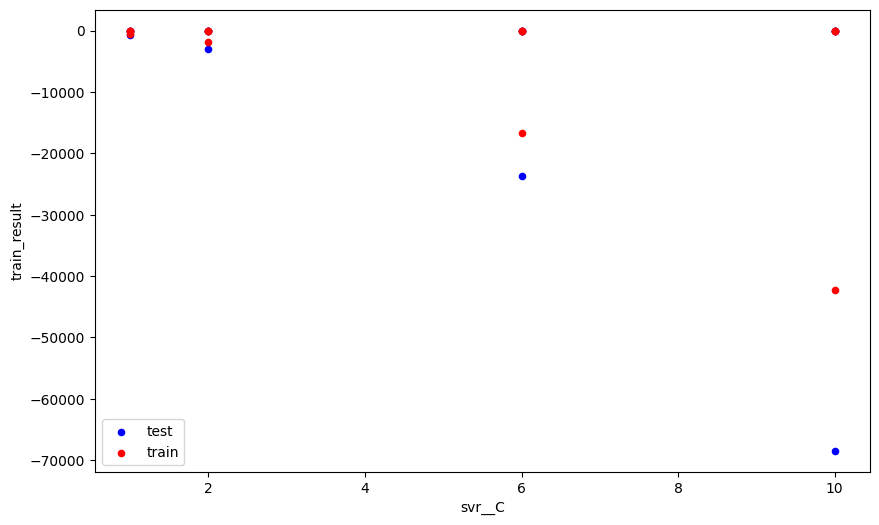

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [81]:
#Aunque el best_estimator me da que C=10 es lo mejor, observo que ahí la diferencia entre train y test es muy grande. Voy a afinal el gs.
grid_params = {
    # 'svr__kernel' : ['poly'],
    'svr__C' : [1.0,1.5,2.0,2.5, 3.0, 4.0]
}
gs2_svr_fino = GridSearchCV(pipe2_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)
gs2_svr_fino.fit(X_lon, y_lon)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [1.0, 1.5, 2.0, 2.5, 3.0, 4.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [82]:
df_res2 = pd.DataFrame(gs2_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs2_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs2_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,test_result,train_result
0,1.0,-2.787975,-1.602998
1,1.5,-2.773616,-1.585594
2,2.0,-2.778904,-1.572698
3,2.5,-2.788245,-1.561818
4,3.0,-2.795007,-1.554368
5,4.0,-2.807393,-1.544115


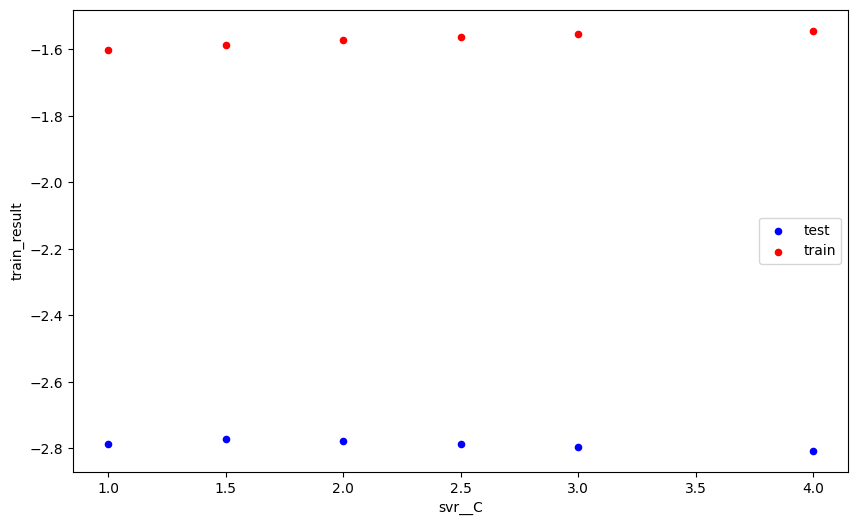

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

#La diferencia entre train y test no varía mucho, pero el restultado de test es un poco mejor para C=2.5, por lo que es el parámetro que consideraremos como óptimo

In [84]:
pipe2_final = Pipeline([('scaler', StandardScaler()), ('svr', SVR(C=2.5, kernel='poly'))])
final_svr_model2 = pipe2_final.fit(X_lon, y_lon)
y_pred_lon_svr = final_svr_model2.predict(X_lon)

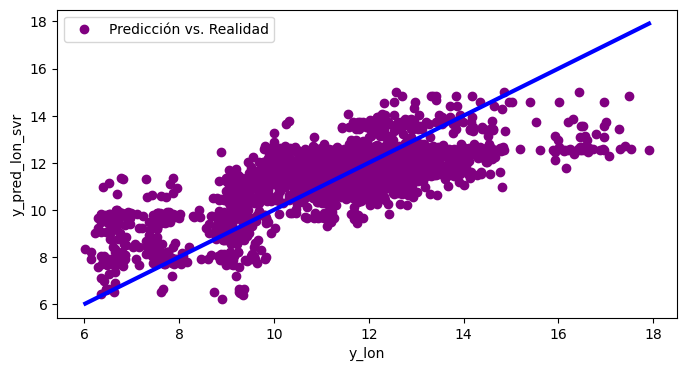

In [85]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_lon, y=y_pred_lon_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_lon), max(y_lon)], [min(y_lon), max(y_lon)], color='blue', linewidth=3)

ax.set_xlabel('y_lon')
ax.set_ylabel('y_pred_lon_svr')

ax.legend()

In [86]:
print('SVR:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_svr)):.2f}')

SVR:
MAE:  1.09
RMSE: 1.39


### Inteligencia - SVM

In [87]:
pipe3_svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 3.0, 4.0]
}
gs3_svr= GridSearchCV(pipe3_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [88]:
svr_model3 = gs3_svr.fit (X_int, y_int)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [89]:
df_res = pd.DataFrame(gs3_svr.cv_results_['params'])
df_res['test_result'] = gs3_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs3_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-1070.406097,-654.436973
1,1.0,poly,-1621.851680,-631.091347
2,1.0,rbf,-1024.471486,-539.930586
3,1.0,sigmoid,-1131.075390,-751.097690
4,2.0,linear,-1071.164154,-655.911003
5,2.0,poly,-1713.204697,-616.959128
6,2.0,rbf,-1091.898257,-528.587908
7,2.0,sigmoid,-1315.245196,-1390.182564
8,3.0,linear,-1070.363548,-656.271357
9,3.0,poly,-1758.645167,-611.331657


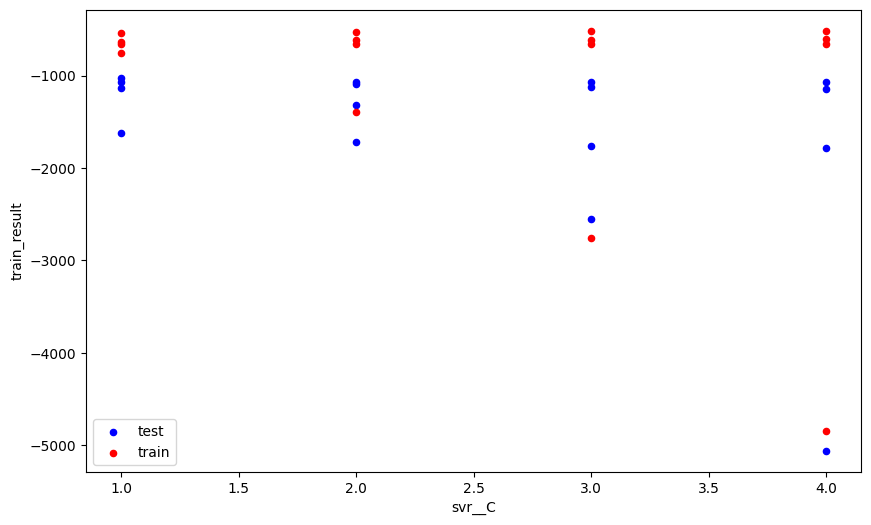

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [91]:
grid_params = {
    'svr__kernel' : ['rbf'],
    'svr__C' : [0.01, 0.1,0.2,0.3, 1.0]
}
gs3_svr_fino= GridSearchCV(pipe3_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [92]:
gs3_svr_fino.fit(X_int, y_int)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 0.2, 0.3, 1.0],
                         'svr__kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [93]:
df_res2 = pd.DataFrame(gs3_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs3_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs3_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,svr__kernel,test_result,train_result
0,0.01,rbf,-1119.263050,-862.081786
1,0.10,rbf,-1047.893576,-730.357427
2,0.20,rbf,-1019.506977,-652.315172
3,0.30,rbf,-1006.385676,-607.404923
4,1.00,rbf,-1024.471486,-539.930586


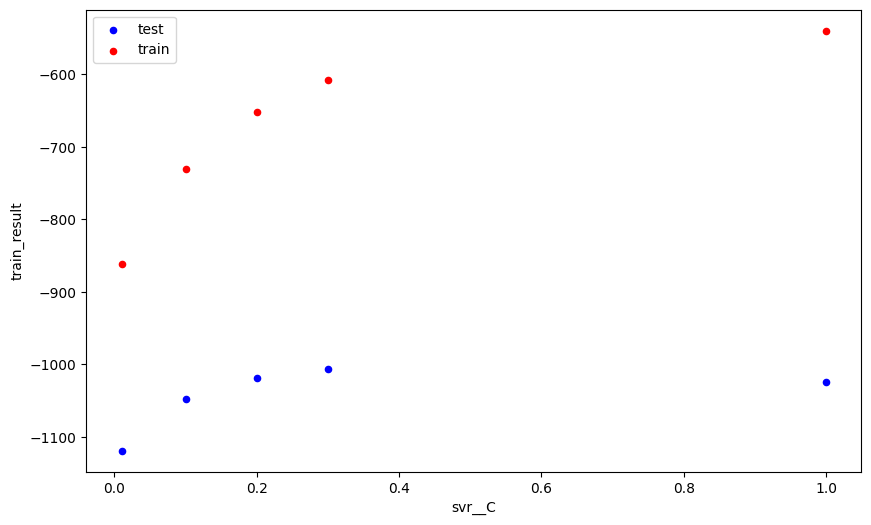

In [94]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [95]:
#me quedo con los parámetros C=0.2 y Kernel=rbf
pipe3_final = Pipeline([('scaler', StandardScaler()), ('svr', SVR(C=0.2, kernel='rbf'))])
final_svr_model3 = pipe3_final.fit(X_int, y_int)
y_pred_int_svr = final_svr_model3.predict(X_int)

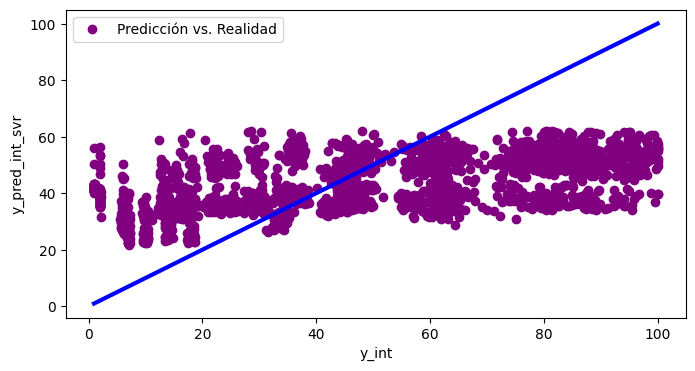

In [96]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_int, y=y_pred_int_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_int), max(y_int)], [min(y_int), max(y_int)], color='blue', linewidth=3)

ax.set_xlabel('y_int')
ax.set_ylabel('y_pred_int_svr')

ax.legend()

In [97]:
print('SVR:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_svr)):.2f}')

SVR:
MAE:  21.91
RMSE: 25.60


# Random Forest Regressor - RFR

### Tamaño - Random Forest

In [98]:
pipe1_rf = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])
grid_params = {
    #'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    #'rfr__max_depth' : [5, 10, 15, 20],
    'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs1_rf= GridSearchCV(pipe1_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [99]:
rf_model1 = gs1_rf.fit(X_tam, y_tam)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [100]:
df_res = pd.DataFrame(gs1_rf.cv_results_['params'])
df_res['test_result'] = gs1_rf.cv_results_['mean_test_score']
df_res ['train_result'] = gs1_rf.cv_results_['mean_train_score']
df_res

,rfr__min_samples_split,test_result,train_result
0,5,-221.403602,-115.840819
1,10,-211.059968,-123.700239
2,15,-205.740373,-129.538426
3,20,-203.257732,-133.562779


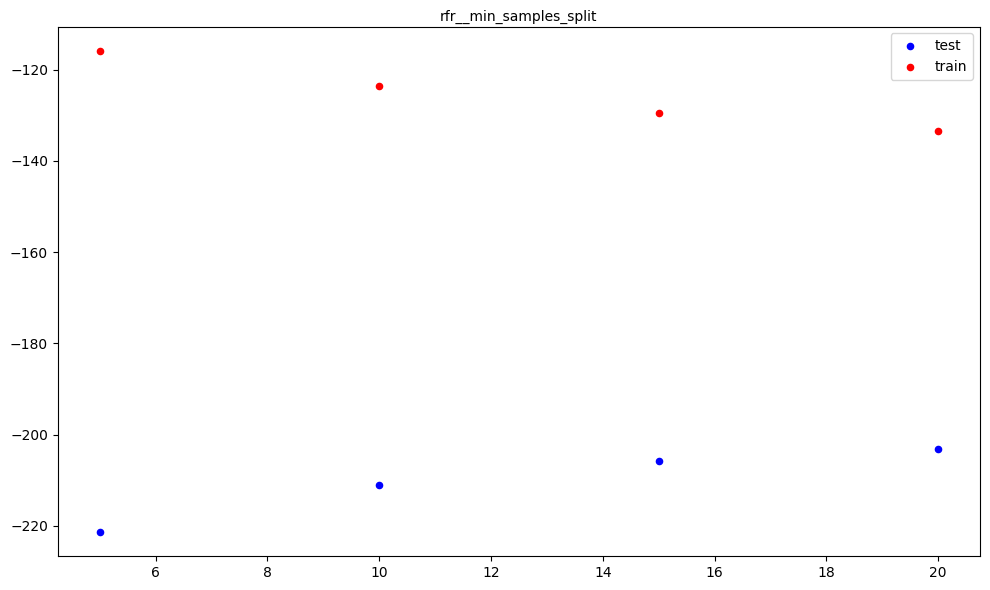

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
# df_res.plot.scatter('rfr__n_estimators', 'test_result', ax=ax, color='blue')
# df_res.plot.scatter('rfr__n_estimators', 'train_result', ax=ax, color='red')
# ax.legend(labels=['test', 'train'], loc='center')
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')

# df_res.plot.scatter('rfr__max_depth', 'test_result', label='test', ax=axes[1], color='blue')
# df_res.plot.scatter('rfr__max_depth', 'train_result', label='train', ax=axes[1], color='red')
# axes[1].legend()
# axes[1].set_ylabel('')
# axes[1].xaxis.set_label_position('top')

df_res.plot.scatter('rfr__min_samples_split', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('rfr__min_samples_split', 'train_result', label='train', ax=ax, color='red')
ax.legend()
ax.set_ylabel('')
ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()


Para min_sample_splits obtengo 20 como parámetro óptimo, pero veo por el gráfico que podría estar entre 15 y 20

Para n_estimators, por el gráfico, veo que lo mejor sería alrededor de 70

Para max_depth obtengo 3 como mejor parámetro

In [102]:
pipe1_final = Pipeline([('scaler',StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=70, min_samples_split=30, max_depth=3))])
final_rf_model1 = pipe1_final.fit(X_tam, y_tam)
y_pred_tam_rf = final_rf_model1.predict(X_tam)

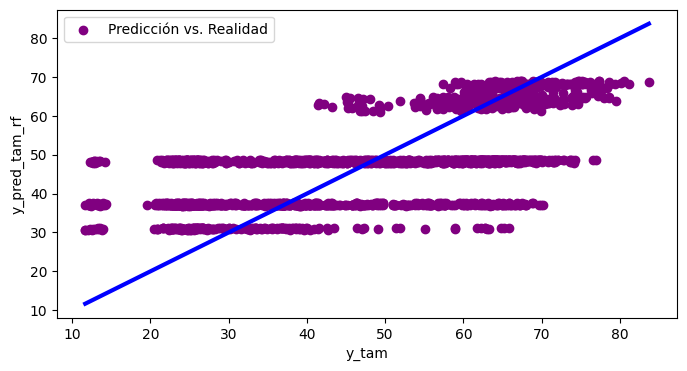

In [103]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_tam, y=y_pred_tam_rf, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_tam), max(y_tam)], [min(y_tam), max(y_tam)], color='blue', linewidth=3)

ax.set_xlabel('y_tam')
ax.set_ylabel('y_pred_tam_rf')

ax.legend()

In [104]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_rf)):.2f}')

Random Forest:
MAE:  10.69
RMSE: 13.26


### Longevidad - Random Forest

In [105]:
pipe2_rf = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(random_state=42))])
grid_params = {
    'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    #'rfr__max_depth' : [5, 10, 15, 20],
    #'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs2_rf= GridSearchCV(pipe2_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [106]:
rf_model2 = gs2_rf.fit(X_lon, y_lon)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [107]:
df_res = pd.DataFrame(gs2_rf.cv_results_['params'])
df_res['test_result'] = gs2_rf.cv_results_['mean_test_score']
df_res ['train_result'] = gs2_rf.cv_results_['mean_train_score']
df_res

,rfr__n_estimators,test_result,train_result
0,10,-3.027727,-1.172285
1,30,-2.974089,-1.152070
2,50,-2.998463,-1.147557
3,70,-2.992699,-1.145575
4,100,-2.987827,-1.143919
5,120,-2.989988,-1.143259
6,150,-2.989586,-1.142610


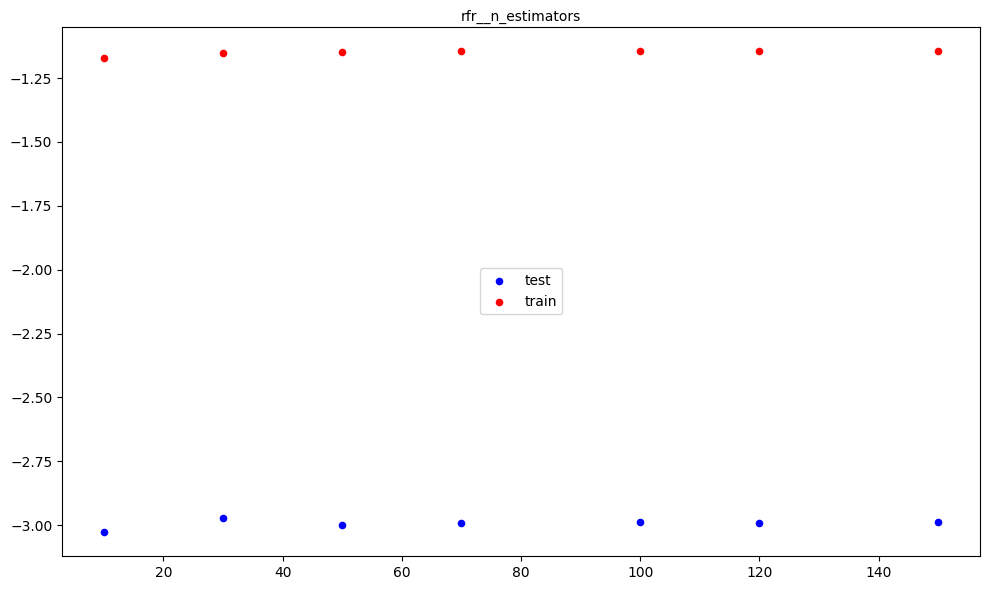

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('rfr__n_estimators', 'test_result', ax=ax, color='blue')
df_res.plot.scatter('rfr__n_estimators', 'train_result', ax=ax, color='red')
ax.legend(labels=['test', 'train'], loc='center')
ax.set_ylabel('')
ax.xaxis.set_label_position('top')

# df_res.plot.scatter('rfr__max_depth', 'test_result', label='test', ax=ax, color='blue')
# df_res.plot.scatter('rfr__max_depth', 'train_result', label='train', ax=ax, color='red')
# ax.legend(labels=['test', 'train'])
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')


# df_res.plot.scatter('rfr__min_samples_split', 'test_result', label='test', ax=ax, color='blue')
# df_res.plot.scatter('rfr__min_samples_split', 'train_result', label='train', ax=ax, color='red')
# ax.legend()
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

Obtengo como best_params: max_depth=10, n_estimators=50 y min_sample_split=20

max_depth voy a afinar entre 6 y 10, n_estimators entre 50 y 70 y min_sample_split entre 12 y 14


In [109]:
grid_params = {
    'rfr__n_estimators' : [50,60,70],
    'rfr__max_depth' : [6,8,10],
    'rfr__min_samples_split' : [12,13,14]
}
gs2_rf_fino= GridSearchCV(pipe2_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [110]:
rf_model2_fino = gs2_rf_fino.fit(X_lon, y_lon)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [111]:
df_res2 = pd.DataFrame(rf_model2_fino.cv_results_['params'])
df_res2['test_result'] = rf_model2_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = rf_model2_fino.cv_results_['mean_train_score']

In [112]:
pipe2_final = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=60, min_samples_split=13, max_depth=8))])
final_rf_model2 = pipe2_final.fit(X_lon, y_lon)
y_pred_lon_rf = final_rf_model2.predict(X_lon)

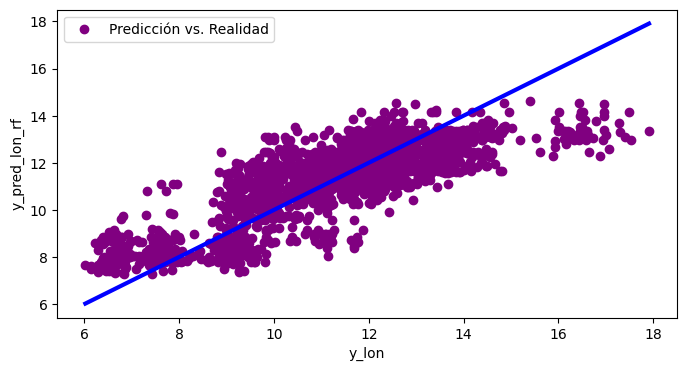

In [113]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_lon, y=y_pred_lon_rf, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_lon), max(y_lon)], [min(y_lon), max(y_lon)], color='blue', linewidth=3)

ax.set_xlabel('y_lon')
ax.set_ylabel('y_pred_lon_rf')

ax.legend()

In [114]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_rf)):.2f}')

Random Forest:
MAE:  0.94
RMSE: 1.21


### Inteligencia - Random Forest

In [115]:
pipe2_rf_int = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(random_state=42))])
grid_params = {
    'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    'rfr__max_depth' : [5, 10, 15, 20],
    'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs2_rf_int= GridSearchCV(pipe2_rf_int, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [116]:
fitted_model = gs2_rf_int.fit(X_int, y_int)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [117]:
model_rfr_int = fitted_model.best_estimator_ #habría que hacer más gs

In [118]:
y_pred_int_rfr = model_rfr_int.predict(X_int)

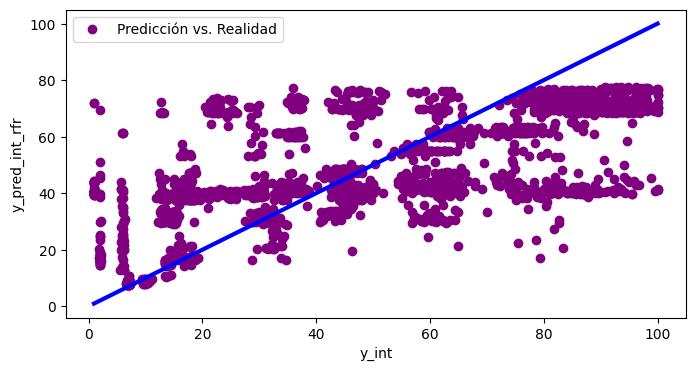

In [119]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_int, y=y_pred_int_rfr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_int), max(y_int)], [min(y_int), max(y_int)], color='blue', linewidth=3)

ax.set_xlabel('y_int')
ax.set_ylabel('y_pred_int_rfr')

ax.legend()

In [120]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_rfr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_rfr)):.2f}')

Random Forest:
MAE:  16.84
RMSE: 21.55


# Conclusiones:

No hemos conseguido encontrar ni un solo algoritmo satisfactorio para tamaño ni inteligencia, por lo que sus variables continuas quedan descartadas, y pasamos a intentar predecirlos por clasificación de sus variables categóricas.

Por otra parte en el caso de longevidad hemos encontrado unos cuantos modelos aceptables, a continuación se listarán sus RMSE (raíz del error cuadrático medio) que es la métrica en la que nos vamos a basar para elegir el mejor modelo:

In [121]:
print('Métricas para los modelos de Longevidad\n')

print('Lineal:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, Y_PRED_lon)):.2f}\n')

print('Polinomio grado 2:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d2_lon)):.2f}\n')

print('Polinomio grado 3:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d3_lon)):.2f}\n')

print('Decission Tree:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_dt_pred_lon)):.2f}\n')

print('Lasso:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_lasso)):.2f}\n')

print('SVR:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_svr)):.2f}\n')

print('Random Forest:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_rf)):.2f}\n')

Métricas para los modelos de Longevidad

Lineal:
RMSE: 1.42

Polinomio grado 2:
RMSE: 1.38

Polinomio grado 3:
RMSE: 1.37

Decission Tree:
RMSE: 1.28

Lasso:
RMSE: 1.39

SVR:
RMSE: 1.39

Random Forest:
RMSE: 1.21



Como la que mejor RMSE nos sale el Random Forest, ese es el que se elige para proseguir al paso final de cálculo de distancias.

# Guardado de modelos:

In [122]:
pickle.dump(final_rf_model2, open("Models/modelo_rfr_lon_final.pkl", "wb"))